# Miniproject Statistics: Timo Halbesma, Geert Raaijmakers, Sarah Brands

This notebook is structured as follows:
- Functions relevant for the parsing of data
- Functions relevant for data analysis
- Data analysis, plots, conclusions
- Summary of findings

In [74]:
# To reflect changes in file made outside of iPython notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
# Enable showing plots inside iPython notebook
%matplotlib inline

In [76]:
# %load QuasarObservation.py
"""
File: QuasarObservation.py
Authors: Timo L. R. Halbesma <timo.halbesma@student.uva.nl>
         Sarah Brands <saaaaaaaar@hotmail.com>
         Geert Raaijmakers <raaymakers8@hotmail.com>

Version: 0.01 (Initial)
Date created: Fri Nov 06, 2015 02:35 pm
Last modified: Thu Nov 12, 2015 04:19 PM

Description:
    Statistical Methods for the Physical Sciences (5214SMFA3Y) --
    Group mini-project --
    Sloan Digital Sky Survey Data Release 7 (SDSS DR7) --
    Catalog of Quasar Properties (CoQP) -- Data from Yue Shen (2011)
    See http://adsabs.harvard.edu/abs/2011ApJS..194...45S

Usage:
    use class 'QuasarObservation' from file 'QuasarObservation' to store
    dataset obtained as part of the assignment.

Functions:
    __init__: create new instance of QuasarObservation class.

    __str__: print quasar observation data (all attributes of the class).

    clean: change missing data from '-1' or '0' to Python's Nonetype.
        keyword arguments:
            verbose       -- Print bad measurement (could be used)
            debug -- Print every bad datapoint (bad idea to use!)

    to_si_for_Sarah: returns new quasar with attributes in SI, not cgs.
"""


class QuasarObservation(object):
    """ SDSS DR7 CoQP Quasar Observation """
    def __init__(self,
                 Row, RA, DEC,
                 REDSHIFT, UNIFORM_TARGET, LOGLBOL,
                 LOGLBOL_ERR, R_6CM_2500A,
                 LOGL5100, LOGL5100_ERR,
                 LOGL3000, LOGL3000_ERR,
                 LOGL1350, LOGL1350_ERR,
                 LOGL_BROAD_HA, LOGL_BROAD_HA_ERR,
                 LOGL_NARROW_HA, LOGL_NARROW_HA_ERR,
                 LOGL_BROAD_HB, LOGL_BROAD_HB_ERR,
                 LOGL_NARROW_HB, LOGL_NARROW_HB_ERR,
                 LOGL_OIII_5007, LOGL_OIII_5007_ERR,
                 LOGL_MGII, LOGL_MGII_ERR,
                 LOGL_CIV, LOGL_CIV_ERR,
                 LOGBH, LOGBH_ERR
                 ):

        self.Row = Row
        self.RA = RA
        self.DEC = DEC
        self.REDSHIFT = REDSHIFT

        """
            Uniformity flag - an integer denoting the sample the quasar is
            drawn from. Not so relevant here but Shen advises that flag=2
            objects are not suitable for statistical studies so you should
            try to exclude them.
        """
        self.UNIFORM_TARGET = UNIFORM_TARGET

        # In log_10(L_bol) [erg/s]
        self.LOGLBOL = LOGLBOL
        self.LOGLBOL_ERR = LOGLBOL_ERR

        # radio intensity (6cm) / optical intensity (250 nm)
        self.R_6CM_2500A = R_6CM_2500A

        """ 'Continuum' luminosities and errors obtained at three
            separate rest-frame  wavelengths: 510 nm (optical), 300 nm
            (near-UV) and 135 nm (far-UV).  This emission  is caused by
            thermal blackbody emission from material falling towards the
            black hole in  an 'accretion disc'.
        """
        self.LOGL5100 = LOGL5100  # Optical
        self.LOGL5100_ERR = LOGL5100_ERR
        self.LOGL3000 = LOGL3000  # Near_UV
        self.LOGL3000_ERR = LOGL3000_ERR
        self.LOGL1350 = LOGL1350  # Far-UV
        self.LOGL1350_ERR = LOGL1350_ERR

        """ Atomic emission line luminosities and errors associated with
            Halpha (broad and  narrow line components given separately)
            Hbeta (also broad and narrow lines), [OIII] (500.7 nm), MgII
            and CIV. The emission lines are produced by gas clouds at
            various  differences from the black hole, and illuminated by
            the accretion disc.
        """
        self.LOGL_BROAD_HA = LOGL_BROAD_HA
        self.LOGL_BROAD_HA_ERR = LOGL_BROAD_HA_ERR
        self.LOGL_NARROW_HA = LOGL_NARROW_HA
        self.LOGL_NARROW_HA_ERR = LOGL_NARROW_HA_ERR
        self.LOGL_BROAD_HB = LOGL_BROAD_HB
        self.LOGL_BROAD_HB_ERR = LOGL_BROAD_HB_ERR
        self.LOGL_NARROW_HB = LOGL_NARROW_HB
        self.LOGL_NARROW_HB_ERR = LOGL_NARROW_HB_ERR
        self.LOGL_OIII_5007 = LOGL_OIII_5007
        self.LOGL_OIII_5007_ERR = LOGL_OIII_5007_ERR
        self.LOGL_MGII = LOGL_MGII
        self.LOGL_MGII_ERR = LOGL_MGII_ERR
        self.LOGL_CIV = LOGL_CIV
        self.LOGL_CIV_ERR = LOGL_CIV_ERR

        """ Black hole mass (expressed as log10 of the mass in units
            of solar mass) and its  error.
        """
        self.LOGBH = LOGBH  # log_10(M/M_Sun)
        self.LOGBH_ERR = LOGBH_ERR

    def __str__(self):
        """ Printing an instance of QuasarObservation class
            calls this function """
        str = "" + \
            "Quasar {0}\n".format(self.Row) + \
            "RA \t\t\t {0}\n".format(self.RA) + \
            "DEC \t\t\t {0}\n".format(self.DEC) + \
            "REDSHIFT \t\t {0}\n".format(self.REDSHIFT) + \
            "UNIFORM_TARGET \t\t {0}\n".format(self.UNIFORM_TARGET) + \
            "LOGLBOL \t\t {0}\n".format(self.LOGLBOL) + \
            "LOGLBOL_ERR \t\t {0}\n".format(self.LOGLBOL_ERR) + \
            "R_6CM_2500A \t\t {0}\n".format(self.R_6CM_2500A) + \
            "LOGL5100 \t\t {0}\n".format(self.LOGL5100) + \
            "LOGL5100_ERR \t\t {0}\n".format(self.LOGL5100_ERR) + \
            "LOGL3000 \t\t {0}\n".format(self.LOGL3000) + \
            "LOGL3000_ERR \t\t {0}\n".format(self.LOGL3000_ERR) + \
            "LOGL1350 \t\t {0}\n".format(self.LOGL1350) + \
            "LOGL1350_ERR \t\t {0}\n".format(self.LOGL1350_ERR) + \
            "LOGL_BROAD_HA \t\t {0}\n".format(self.LOGL_BROAD_HA) + \
            "LOGL_BROAD_HA_ERR \t {0}\n".format(self.LOGL_BROAD_HA_ERR) + \
            "LOGL_NARROW_HA \t\t {0}\n".format(self.LOGL_NARROW_HA) + \
            "LOGL_NARROW_HA_ERR \t {0}\n".format(self.LOGL_NARROW_HA_ERR) + \
            "LOGL_BROAD_HB \t\t {0}\n".format(self.LOGL_BROAD_HB) + \
            "LOGL_BROAD_HB_ERR \t {0}\n".format(self.LOGL_BROAD_HB_ERR) + \
            "LOGL_NARROW_HB \t\t {0}\n".format(self.LOGL_NARROW_HB) + \
            "LOGL_NARROW_HB_ERR \t {0}\n".format(self.LOGL_NARROW_HB_ERR) + \
            "LOGL_OIII_5007 \t\t {0}\n".format(self.LOGL_OIII_5007) + \
            "LOGL_OIII_5007_ERR \t {0}\n".format(self.LOGL_OIII_5007_ERR) + \
            "LOGL_MGII \t\t {0}\n".format(self.LOGL_MGII) + \
            "LOGL_MGII_ERR \t\t {0}\n".format(self.LOGL_MGII_ERR) + \
            "LOGL_CIV \t\t {0}\n".format(self.LOGL_CIV) + \
            "LOGL_CIV_ERR \t\t {0}\n".format(self.LOGL_CIV_ERR) + \
            "LOGBH \t\t\t {0}\n".format(self.LOGBH) + \
            "LOGBH_ERR \t\t {0}".format(self.LOGBH_ERR)

        return str

    def clean(self, verbose=False, debug=False):
        """
        i) If quasar uniformity is 2 it should be excluded
        from the statistical sample, according to Yue Shen
        ii) Missing values are denoted as -1. Here, change it to None.
        iii) Missing luminosities, however, are denoted as zero. Change to None.
        """

        if self.UNIFORM_TARGET == 2:
            if debug:
                print 'WARN: {0} should be excluded' \
                    .format(self.Row),
                print 'from the statistical sample. Uniformity = 2'

        for attr in [a for a in dir(self) if not a.startswith('__')]:
            attr_value = getattr(self, attr)
            if ('LOGL' in attr and attr_value == 0) or\
                    ('LOGL' not in attr and attr_value == -1):
                setattr(self, attr, None)
                if debug:  # bad idea to print this :-)...
                    print "WARN: '{0}' misses '{1}', was '{2}', now set to '{3}'." \
                        .format(self.Row, attr, attr_value,
                                getattr(self, attr))


    def to_si_for_Sarah(self):
        """ Return new instance of QuasarObservation with attribtues in SI """
        def lum_to_si(log_10_of_lum):
            """ Convert log(L) in erg/s to L in W """
            if log_10_of_lum:  # Prevent error when data misses.
                return 10**(log_10_of_lum) * 1e-7  # erg/s => W
            else:
                return None
        def MSun_to_si(solarmass):
            """ Convert solar mass to SI mass """
            if solarmass:  # Prevent error when data misses.
                return solarmass*1.988435e30,  # MSun => kg
            else:
                return None

        def ra_to_hour(RA):
            """ Convert right ascension from degrees to hour, min, sec """
            ra_hour = int(RA/15)
            ra_min = int(60*((RA/15) % 1))
            ra_sec = 60*((60*((RA/15) % 1)) % 1)
            return " {0:02d}h {1:02d}m {2:.2f}s"\
                .format(ra_hour, ra_min, ra_sec)

        def dec_to_hour(DEC):
            """ Convert declination from degrees to deg, min, sec """
            dec_hour = int(abs(DEC))
            dec_min = int(60*(abs(DEC) % 1))  # might have precision issues
            dec_sec = 60*((60*(abs(DEC) % 1)) % 1)
            return "{0}{1:02d}d {2:02d}' {3:.2f}\""\
                .format("+" if DEC > 0 else "-", dec_hour, dec_min, dec_sec)

        return QuasarObservation(
            self.Row,
            ra_to_hour(self.RA), dec_to_hour(self.DEC),
            # self.RA, self.DEC,
            self.REDSHIFT, self.UNIFORM_TARGET,
            lum_to_si(self.LOGLBOL),
            lum_to_si(self.LOGLBOL_ERR),
            self.R_6CM_2500A,
            lum_to_si(self.LOGL5100),
            lum_to_si(self.LOGL5100_ERR),
            lum_to_si(self.LOGL3000),
            lum_to_si(self.LOGL3000_ERR),
            lum_to_si(self.LOGL1350),
            lum_to_si(self.LOGL1350_ERR),
            lum_to_si(self.LOGL_BROAD_HA),
            lum_to_si(self.LOGL_BROAD_HA_ERR),
            lum_to_si(self.LOGL_NARROW_HA),
            lum_to_si(self.LOGL_NARROW_HA_ERR),
            lum_to_si(self.LOGL_BROAD_HB),
            lum_to_si(self.LOGL_BROAD_HB_ERR),
            lum_to_si(self.LOGL_NARROW_HB),
            lum_to_si(self.LOGL_NARROW_HB_ERR),
            lum_to_si(self.LOGL_OIII_5007),
            lum_to_si(self.LOGL_OIII_5007_ERR),
            lum_to_si(self.LOGL_MGII),
            lum_to_si(self.LOGL_MGII_ERR),
            lum_to_si(self.LOGL_CIV),
            lum_to_si(self.LOGL_CIV_ERR),
            MSun_to_si(self.LOGBH),
            MSun_to_si(self.LOGBH_ERR)
            )


In [77]:
# %load parse_dataset.py
"""
File: parse_dataset.py
Authors: Timo L. R. Halbesma <timo.halbesma@student.uva.nl>
         Sarah Brands <saaaaaaaar@hotmail.com>
         Geert Raaijmakers <raaymakers8@hotmail.com>

Version: 1.0 (Final Draft)
Date created: Wed Nov 11, 2015 02:45 PM
Last modified: Thu Nov 19, 2015 03:45 PM

Description:
    Statistical Methods for the Physical Sciences (5214SMFA3Y) --
    Group mini-project --
    Sloan Digital Sky Survey Data Release 7 (SDSS DR7) --
    Catalog of Quasar Properties (CoQP) -- Data from Yue Shen (2011)
    See http://adsabs.harvard.edu/abs/2011ApJS..194...45S

Usage:
    call function 'parse_dataset' from file 'parse_dataset'.
    e.g.:
        from parse_dataset import parse_dataset
        quasars = parse_dataset('sdss_dr7_qsos.dat')

Keyword arguments:
    filename  -- filename of datafile, defaults to 'sdss_dr7_qsos.dat'.
    verbose   -- give verbose output while reading data, defaults to True.
    debug     -- print additional information for development, default False.
"""


import sys
import time
import csv

import numpy

from QuasarObservation import QuasarObservation


def parse_dataset(filename='sdss_dr7_qsos.dat', verbose=True, debug=False):
    """ Open and parse dataset. If possible return numpy array, else list """

    # http://www.cyberciti.biz/faq/python-run-external-command-and-get-output/
    if verbose:
        print "Reading dataset '{0}' started.".format(filename)

    use_array, i = False, 1  # Have i start at 1 such that index equals
    skipped, skipped_list = 0, []
    try:
        import subprocess
        p = subprocess.Popen("wc -l {0}".format(filename),
                             stdout=subprocess.PIPE, shell=True)
        output, err = p.communicate()
        p_status = p.wait()

        file_length = output.split()[0]
    # Very bad practice, but just in case anything breaks at TA's machine..
    except:
        if verbose:
            print 'WARN: Failed to obtain file length. Reading into lists.'
        quasars = []
        quasars.append(None)
    else:
        try:
            file_length = int(file_length)
        except ValueError:
            if verbose:
                print 'WARN: Failed to obtain file length. Reading into lists.'
            quasars = []
            quasars.append(None)
        else:
            if p_status is 0 and type(file_length) is int:
                if verbose:
                    print 'Reading into numpy arrays :-)'
                qo_dtype = numpy.dtype(QuasarObservation)
                quasars = numpy.empty(file_length, dtype=qo_dtype)
                use_array = True

    if verbose:
        start_time = time.time()

    with open(filename, 'r') as f:
        reader = csv.reader(f)
        reader.next()  # Skip first (header) row
        for row in reader:
            # row list -> string, strip whitespace, split into list
            column_list = row[0].strip().split()

            Row = int(column_list[0])
            RA = float(column_list[1])
            DEC = float(column_list[2])
            REDSHIFT = float(column_list[3])
            UNIFORM_TARGET = float(column_list[4])
            LOGLBOL = float(column_list[5])  # log_10(L_bol) [erg/s]
            LOGLBOL_ERR = float(column_list[6])

            # radio intensity (6cm) / optical intensity (250 nm)
            R_6CM_2500A = float(column_list[7])

            LOGL5100 = float(column_list[8])  # Optical
            LOGL5100_ERR = float(column_list[9])
            LOGL3000 = float(column_list[10])  # Near_UV
            LOGL3000_ERR = float(column_list[11])
            LOGL1350 = float(column_list[12])  # Far-UV
            LOGL1350_ERR = float(column_list[13])

            LOGL_BROAD_HA = float(column_list[14])
            LOGL_BROAD_HA_ERR = float(column_list[15])
            LOGL_NARROW_HA = float(column_list[16])
            LOGL_NARROW_HA_ERR = float(column_list[17])
            LOGL_BROAD_HB = float(column_list[18])
            LOGL_BROAD_HB_ERR = float(column_list[19])
            LOGL_NARROW_HB = float(column_list[20])
            LOGL_NARROW_HB_ERR = float(column_list[21])
            LOGL_OIII_5007 = float(column_list[22])
            LOGL_OIII_5007_ERR = float(column_list[23])
            LOGL_MGII = float(column_list[24])
            LOGL_MGII_ERR = float(column_list[25])
            LOGL_CIV = float(column_list[26])
            LOGL_CIV_ERR = float(column_list[27])

            LOGBH = float(column_list[28])  # log_10(M/M_Sun)
            LOGBH_ERR = float(column_list[29])

            quasar = QuasarObservation(
                Row, RA, DEC,
                REDSHIFT, UNIFORM_TARGET, LOGLBOL,
                LOGLBOL_ERR, R_6CM_2500A,
                LOGL5100, LOGL5100_ERR,
                LOGL3000, LOGL3000_ERR,
                LOGL1350, LOGL1350_ERR,
                LOGL_BROAD_HA, LOGL_BROAD_HA_ERR,
                LOGL_NARROW_HA, LOGL_NARROW_HA_ERR,
                LOGL_BROAD_HB, LOGL_BROAD_HB_ERR,
                LOGL_NARROW_HB, LOGL_NARROW_HB_ERR,
                LOGL_OIII_5007, LOGL_OIII_5007_ERR,
                LOGL_MGII, LOGL_MGII_ERR,
                LOGL_CIV, LOGL_CIV_ERR,
                LOGBH, LOGBH_ERR
                )

            quasar.clean()
            if use_array:
                if quasar.UNIFORM_TARGET != 2:
                    quasars[i] = quasar
                else:
                    skipped += 1
                    skipped_list.append(quasar.Row)

                # Print readout progress bar =)
                bar_width = 42  # obviously
                if verbose and ((i == file_length-1) or (i % 100 is 0)):
                    progress = float(i)/file_length
                    block = int(round(bar_width * progress))
                    sys.stdout.write(
                        "\r[{0}{1}] {2:.2f}%"
                        .format('#'*block,
                                ' '*(bar_width - block),
                                progress*100))
                    sys.stdout.flush()

                i = i+1
            else:
                # file length is not known, so no progress bar :-(
                if quasar.UNIFORM_TARGET != 2:
                    quasars.append(quasar)
                else:
                    skipped += 1
                    skipped_list.append(quasar.Row)
                    quasars.append(None)

    if verbose:
        sys.stdout.write('\n')
        print "Read {0} quasars in {1} seconds." \
            .format(len(quasars)-1, time.time() - start_time)
        print "Skipped {0} of the {1} quasars because uniformity is 2."\
            .format(skipped, len(quasars)-1)
        print "Continuing statistical anaylsis with {0} quasars.\n"\
            .format(len(quasars)-skipped-1)
    if debug:
        print "Skipped the following quasars:"
        print skipped_list
    return quasars


In [78]:
# %load find_intersection.py
"""
File: find_intersection.py
Authors: Timo L. R. Halbesma <timo.halbesma@student.uva.nl>
         Sarah Brands <saaaaaaaar@hotmail.com>
         Geert Raaijmakers <raaymakers8@hotmail.com>

Version: 0.01 (Initial)
Date created: Thu Nov 12, 2015 02:00 PM
Last modified: Wed Nov 18, 2015 01:15 PM

Description:
    Statistical Methods for the Physical Sciences (5214SMFA3Y) --
    Group mini-project --
    Sloan Digital Sky Survey Data Release 7 (SDSS DR7) --
    Catalog of Quasar Properties (CoQP) -- Data from Yue Shen (2011)
    See http://adsabs.harvard.edu/abs/2011ApJS..194...45S

Usage:
    call function 'find_intersection' from file 'find_intersection'.
    e.g.:
        from find_intersection import find_intersection
        attr1_list, attr1_err_list, attr2_list, attr2_err_list =\
        find_intersection(quasars, 'LOGL1350', 'LOGL5100')


Keyword arguments:
    quasars -- numpy array/list with QuasarObservation instances
               NB, bad observations are denoted as None in the array/list
    attr1   -- String of attribute, see QuasarObservation class
    attr2   -- String of seocnd attribute. NB at least two attr required!
    attr3   -- Optional, if given: return intersection of three attributes
    attr4   -- Optional, if given: return intersection of four attributes

@return: tuple with lists of attr1 values, lists of attr1 errors,
         attr2 values attr2 errors, optional 3 and 4.
         NB, if attribute has no error, an empty list is returned!
"""


import numpy


def find_intersection(quasars, attr1, attr2, attr3=None, attr4=None):
    """ Find intersection of two, three or four attributes. """
    
    # Attributes in has_no_error list have no attr+'_STR'.
    has_no_error = ['RA', 'DEC', 'REDSHIFT', 'UNIFORM_TARGET', 'R_6CM_2500A']

    attr1_list = []
    attr1_err_list = []
    attr2_list = []
    attr2_err_list = []
    if attr3:
        attr3_list = []
        attr3_err_list = []
    if attr4:
        attr4_list = []
        attr4_err_list = []

    i = 0
    for quasar in quasars:
        # We have None in list/array for pulsars with UNIFORM_TARGET == 2
        if quasar:  # Filters out None
            attr1_value = getattr(quasar, attr1, None)

            if attr1 not in has_no_error:
                attr1_error = getattr(quasar, attr1+'_ERR', None)
            attr2_value = getattr(quasar, attr2, None)

            if attr2 not in has_no_error:
                attr2_error = getattr(quasar, attr2+'_ERR', None)
            if attr3:
                attr3_value = getattr(quasar, attr3, None)
                if attr3 not in has_no_error:
                    attr3_error = getattr(quasar, attr3+'_ERR', None)
            else:
                attr3_value = True
            if attr4:
                attr4_value = getattr(quasar, attr4, None)
                if attr4 in has_no_error:
                    attr4_error = getattr(quasar, attr4+'_ERR', None)
            else:
                attr4_value = True

            if attr1_value and attr2_value and attr3_value and attr4_value:
                i += 1
                attr1_list.append(attr1_value)
                if attr1 not in has_no_error:
                    attr1_err_list.append(attr1_error)
                attr2_list.append(attr2_value)
                if attr2 not in has_no_error:
                    attr2_err_list.append(attr2_error)
                if attr3:
                    attr3_list.append(attr3_value)
                    if attr3 not in has_no_error:
                        attr3_err_list.append(attr3_error)
                if attr4:
                    attr4_list.append(attr4_value)
                    if attr4 not in has_no_error:
                        attr4_err_list.append(attr4_error)

    if attr4:
        print "Found {0} quasars in intersection of"\
            .format(i),
        print " '{0}', '{1}', '{2}', and '{3}'"\
            .format(attr1, attr2, attr3, attr4)
        return numpy.asarray(attr1_list), numpy.asarray(attr1_err_list),\
            numpy.asarray(attr2_list), numpy.asarray(attr2_err_list),\
            numpy.asarray(attr3_list), numpy.asarray(attr3_err_list),\
            numpy.asarray(attr4_list), numpy.asarray(attr4_err_list)
    elif attr3:
        print "Found {0} quasars in intersection of '{1}', '{2}', and '{3}'"\
            .format(i, attr1, attr2, attr3)
        return numpy.asarray(attr1_list), numpy.asarray(attr1_err_list),\
            numpy.asarray(attr2_list), numpy.asarray(attr2_err_list),\
            numpy.asarray(attr3_list), numpy.asarray(attr3_err_list)
    else:
        print "Found {0} quasars in intersection of '{1}' and '{2}'"\
            .format(i, attr1, attr2)
        return numpy.asarray(attr1_list), numpy.asarray(attr1_err_list),\
            numpy.asarray(attr2_list), numpy.asarray(attr2_err_list)


In [79]:
# %load statistics.py
"""
File: statistics.py
Authors: Timo L. R. Halbesma <timo.halbesma@student.uva.nl>
         Sarah Brands <saaaaaaaar@hotmail.com>
         Geert Raaijmakers <raaymakers8@hotmail.com>

Version: 1.0 (Final Draft)
Date created: Fri Nov 13, 2015 12:07 pm
Last modified: Thu Nov 19, 2015 03:45 PM

Description:
    Statistical Methods for the Physical Sciences (5214SMFA3Y) --
    Group mini-project --
    Sloan Digital Sky Survey Data Release 7 (SDSS DR7) --
    Catalog of Quasar Properties (CoQP) -- Data from Yue Shen (2011)
    See http://adsabs.harvard.edu/abs/2011ApJS..194...45S

Usage:
    See Statistical Methods Group Assignment TLRH, SAB, GR notebook
"""

import numpy
import pandas
import scipy
from scipy import stats
import matplotlib
from matplotlib import pyplot

# from parse_dataset import parse_dataset
from find_intersection import find_intersection


def do_linear_regression(x_data, x_data_err, y_data, y_data_err,
                         number_quasars):
    """ Calculate and plot linear regression """

    x_data = numpy.array(x_data[0:number_quasars])
    x_data_err = x_data_err[0:number_quasars]
    y_data = numpy.array(y_data[0:number_quasars])
    y_data_err = y_data_err[0:number_quasars]
    func = lambda x, a, b: a*x + b

    r, pcov = scipy.optimize.curve_fit(func, x_data, y_data,
                                       sigma=y_data_err, p0=(1, 1))

    fig, ax = pyplot.subplots(1, 1, figsize=(10, 6))
    ax.errorbar(x_data, y_data, xerr=x_data_err, yerr=y_data_err,
                ls='none', color='grey')
    ax.plot(x_data, r[0]*x_data + r[1], color='red')
    ax.set_xlabel('Blackhole Mass (Logarithmic and in solar mass units)',
                  fontsize=15)
    ax.set_ylabel('Luminosity (Logarithmic in ergs/s)', fontsize=15)
    ax.set_title('Linear Regression Blackhole Mass-Luminosity Relation',
                 fontsize=17)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.locator_params(nbins=5)
    pyplot.show()

    err_a = numpy.sqrt(pcov[0, 0])
    err_b = numpy.sqrt(pcov[1, 1])

    print "a={0:.2f}, and b={1:.2f}".format(r[0], r[1]),
    print "Standard deviation of a, s_a={0:.2f}, and of b, s_b={1:.2f}."\
        .format(err_a, err_b)


def bootstrap(x_data, y_data, y_data_err, number_quasars):
    """ Bootstrapping method """

    params = []

    data = numpy.transpose([x_data, y_data, y_data_err])
    n_boot = int(number_quasars * (numpy.log(number_quasars))**2)
    idx = numpy.random.randint(0, number_quasars, (n_boot, number_quasars))
    samples = data[idx]

    func = lambda x, a, b: x*a+b

    for i in range(n_boot):
        r, pcov = scipy.optimize.curve_fit(
            func, samples[i][:, 0], samples[i][:, 1],
            sigma=samples[i][:, 2], p0=(1, 1))

        params.append(r.tolist())

    params = numpy.array(params)

    f, (ax1, ax2) = pyplot.subplots(1, 2, sharey=True, figsize=(10, 6))

    ax1.hist(params[:, 0], histtype='step')
    ax1.set_xlabel('Values for parameter a', fontsize=15)
    ax1.set_ylabel('Frequency', fontsize=15)
    ax2.hist(params[:, 1], histtype='step')
    ax2.set_xlabel('Values for parameter b', fontsize=15)
    ax1.tick_params(axis='both', which='major', labelsize=15)
    ax2.tick_params(axis='both', which='major', labelsize=15)
    f.suptitle('Bootstrapping Linear Regression Parameters', fontsize=17)

    pyplot.show()

    stata = numpy.sort(params[:, 0])
    statb = numpy.sort(params[:, 1])
    low_a, high_a = (stata[int((0.318/2.0)*n_boot)],
                     stata[int((1-0.318/2.0)*n_boot)])
    low_b, high_b = (statb[int((0.318/2.0)*n_boot)],
                     statb[int((1-0.318/2.0)*n_boot)])

    mean_a = numpy.mean(params[:, 0])
    mean_b = numpy.mean(params[:, 1])

    print "Mean value of a is {0:.2f}, and mean value of b is {1:.2f}"\
        .format(mean_a, mean_b)
    print "The 68.2 percent confidence interval for a is [{0:.2f}, {1:.2f}]."\
        .format(low_a, high_a)
    print "The 68.2 percent confidence interval for b is [{0:.2f}, {1:.2f}]."\
        .format(low_b, high_b)


def give_correlation_coefficient(quasars, number_quasars=None):

    if number_quasars is None:
        number_quasars = len(quasars)

    correlation_coefficient = []
    continuum_300 = []
    continuum_510 = []
    Hb_narrow = []
    OIII_5007 = []
    MGII = []

    for i in range(1, number_quasars):
        if quasars[i]:
            continuum_300.append(quasars[i].LOGL3000)
            continuum_510.append(quasars[i].LOGL5100)
            OIII_5007.append(quasars[i].LOGL_OIII_5007)
            Hb_narrow.append(quasars[i].LOGL_NARROW_HB)
            MGII.append(quasars[i].LOGL_MGII)

    rand_data = numpy.array([continuum_510, continuum_300,
                             Hb_narrow, MGII]).transpose()
    ndims = rand_data.shape[1]

    for i in xrange(ndims):
        for j in xrange(ndims):
            correlation = []

            for k, item in enumerate(rand_data):
                if rand_data[k, i] and rand_data[k, j] is not None:
                    correlation.append([rand_data[k, i], rand_data[k, j]])
            correlation = numpy.array(correlation)

            (cor, pval) = scipy.stats.pearsonr(correlation[:, 0],
                                               correlation[:, 1])
            correlation_coefficient.append(cor)

    correlation_coefficient = numpy.array(
        correlation_coefficient).reshape(-1, 4)
    correlation_coefficient = numpy.around(correlation_coefficient, decimals=2)
    names_list = ["Cont 510 nm", "Cont 300 nm", "Hb narrow line", "Mg II line"]
    print "The correlation coefficients are:"
    print pandas.DataFrame(correlation_coefficient, names_list, names_list)


def spearmanr_sarah(x, y):
    """ Implementation of Spearman Rho as Sarah has Scipy 0.13 which
        does not yet contain spearmanr method """
    n = 1.0 * len(x)

    x_rank = scipy.stats.rankdata(x)
    y_rank = scipy.stats.rankdata(y)

    d = x_rank-y_rank
    rho = 1. - (6.*sum(d**2))/(n*(n**2 - 1))

    return rho


def pearsonr_sarah(x, y):
    """ Implementation of Pearson's r as Sarah has Scipy 0.13 which
        does not yet contain pearsonr method """
    n = 1.0 * len(x)

    mean_x = numpy.mean(x)
    mean_y = numpy.mean(y)
    stdev_x = numpy.sqrt(numpy.var(x, ddof=1))
    stdev_y = numpy.sqrt(numpy.var(y, ddof=1))

    x_part = []
    y_part = []

    for i in xrange(int(n)):
        x_part.append((x[i] - mean_x)/stdev_x)
        y_part.append((y[i] - mean_y)/stdev_y)

    x_part = numpy.array(x_part)
    y_part = numpy.array(y_part)

    r = (1./(n - 1.))*sum(x_part*y_part)

    return r


def linear_regression_with_no_error(x_data, y_data):
    """ Implementation of linear regression by Sarah. """

    x_data = numpy.array(x_data)
    y_data = numpy.array(y_data)

    c5 = '#e65b00'
    c6 = '#000000'

    xm = numpy.mean(x_data)
    ym = numpy.mean(y_data)
    x2m = numpy.mean(x_data**2.)
    xym = numpy.mean(y_data*x_data)
    b = (xym - xm*ym)/(x2m - xm**2.)
    a = ym - b*xm

    pyplot.plot(x_data, y_data, "o", color=c5, alpha=0.5, label='data points')
    pyplot.plot(x_data, a+b*x_data, lw=2, color=c6, label='linear regression')
    pyplot.title('Correlatioin redshift Line-luminosity')
    pyplot.show()

    return "y = %.2f + %.2f*x" % (a,b)


def correlate_redshift_emission_line(quasars, line, subset=False):
    """ Plot correlation between redshift and emission line strength.
        Provide Spearman's rho, pearson's R and linear regression. """

    # Get datapoints for which the redshift and line luminosity is known.
    # The error array of the redshift will be empty.
    REDSHIFT, REDSHIFT_ERR, LINE, LINE_ERR\
        = find_intersection(quasars, 'REDSHIFT', line)

    if subset:
        REDSHIFT_range = []
        LINE_range = []

        for i in xrange(len(REDSHIFT)):
            if REDSHIFT[i] > 1.5 and REDSHIFT[i] < 2.2:
                REDSHIFT_range.append(REDSHIFT[i])
                LINE_range.append(LINE[i])

        REDSHIFT = REDSHIFT_range
        LINE = LINE_range

    # Then look at the correlation coefficients and plot the linear regression
    print
    print "Spearman's Rho\nSelf-written method:\t{0}\nScipy method:\t\t{1}"\
        .format(spearmanr_sarah(REDSHIFT, LINE),
                scipy.stats.spearmanr(REDSHIFT, LINE)[0]),
    print
    print "Spearman's r\nSelf-written method:\t{0}\nScipy method:\t\t{1}"\
        .format(pearsonr_sarah(REDSHIFT, LINE),
                scipy.stats.pearsonr(REDSHIFT, LINE)[0])
    print
    print "Linear regression: "
    print linear_regression_with_no_error(REDSHIFT, LINE)


def ks_test(radio_loud_colour, radio_quiet_colour):

    print "Mean color of radio quiet quasars:", numpy.mean(radio_quiet_colour)
    print "Mean color of radio loud quasars:", numpy.mean(radio_loud_colour)

    (D_value, p_value) = scipy.stats.ks_2samp(radio_quiet_colour,
                                              radio_loud_colour)

    print "The K-S test gives us a D-value of {0}".format(D_value),
    print "corresponding to a p-value of {0}.".format(p_value)

    certain = 1.0 - p_value

    print "This means that with {0} certainty we can say".format(certain),
    print "that the two samples are drawn from a different distribution."


def t_statistic(x, y):
    # Means, variance and n of each sample is calculated
    mean_x = numpy.mean(x)
    mean_y = numpy.mean(y)
    vr_x = numpy.var(x, ddof=1)
    vr_y = numpy.var(y, ddof=1)
    n_x = float(len(x))
    n_y = float(len(y))

    # denominator of the t-value is caculated:
    standard_error_diff_of_means = numpy.sqrt(vr_x/n_x + vr_y/n_y)
    # numerator of the t-value is calculated:
    difference_of_means = mean_x - mean_y
    # to make sure the t-value is always positive:
    abs_dom = abs(difference_of_means)

    # The t-value is calculated
    t = abs_dom / standard_error_diff_of_means

    # We now calculate the degrees of freedom, which is needed to calculate
    # the p-value corresponding to the calculated t-value.
    sn_x = vr_x/n_x
    sn_y = vr_y/n_y
    num = (sn_x + sn_y)**2
    denom = (sn_x**2 / (n_x - 1.)) + (sn_y**2 / (n_y - 1.))
    dof = int(num/denom)

    return t, dof


def print_t_statistic(radio_quiet_colour, radio_loud_colour):

    # t-statistic for mean
    (tvalue, ddof) = t_statistic(radio_quiet_colour, radio_loud_colour)

    print "The t-statistic is:", tvalue
    print "Degrees of freedom:", ddof

    # two-sided pvalue for a t-statistic of tvalue with ddof degrees of freedom
    pval = stats.t.sf(numpy.abs(tvalue), ddof)*2

    print "The corresponding p-value is:", pval
    certain = 1.0 - pval

    print "We can thus say that the chance that the difference in color",
    print "between radio loud and radio quiet quasars is significant is {0}."\
        .format(certain)


In [80]:
# %load plotting_functions.py
"""
File: plotting_functions.py
Authors: Timo L. R. Halbesma <timo.halbesma@student.uva.nl>
         Sarah Brands <saaaaaaaar@hotmail.com>
         Geert Raaijmakers <raaymakers8@hotmail.com>

Version: 1.0 (Final Draft)
Date created: Thu Nov 19, 2015 02:53 PM
Last modified: Thu Nov 19, 2015 03:45 PM

Description:
    Statistical Methods for the Physical Sciences (5214SMFA3Y) --
    Group mini-project --
    Sloan Digital Sky Survey Data Release 7 (SDSS DR7) --
    Catalog of Quasar Properties (CoQP) -- Data from Yue Shen (2011)
    See http://adsabs.harvard.edu/abs/2011ApJS..194...45S

Usage:
    See Statistical Methods Group Assignment TLRH, SAB, GR notebook
"""

import sys
import time

import numpy
import scipy
import pandas
from scipy import stats
import matplotlib
from matplotlib import pyplot

# from parse_dataset import parse_dataset
from find_intersection import find_intersection


def progressbar(current, total):
    # Print readout progress bar =)
    bar_width = 42  # obviously
    if ((current == total-1) or (current % 100 is 0)):

        progress = float(current)/total
        block = int(round(bar_width * progress))
        sys.stdout.write(
            "\r[{0}{1}] {2:.2f}%"
            .format('#'*block,
                    ' '*(bar_width - block),
                    progress*100))
        sys.stdout.flush()


def plot_colour_versus_mass(quasars, use_arrays=True):
    """ Find out whether colour is correlated with mass """

    if use_arrays:
        start_time = time.time()
        LOGL3000, LOGL3000_ERR, LOGL5100, LOGL5100_ERR, LOGBH, LOGBH_ERR =\
            find_intersection(quasars, 'LOGL3000', 'LOGL5100', 'LOGBH')
        print "Finding intersection takes {0} seconds." \
              .format(time.time() - start_time)

    start_time = time.time()

    pyplot.figure()

    total = len(quasars)
    plotted_count = 0
    if use_arrays:
        # LOGBH[(numpy.where(LOGBH_ERR < 0.01*LOGBH))]
        pyplot.scatter(LOGBH, LOGL5100 - LOGL3000)
        plotted_count = len(LOGL3000)
    else:
        for i, quasar in enumerate(quasars):
            if quasar and quasar.LOGBH and quasar.LOGL3000 and quasar.LOGL5100:
                    # and quasar.LOGBH_ERR < 0.1*quasar.LOGBH:
                pyplot.scatter(quasar.LOGBH,
                               (quasar.LOGL5100 - quasar.LOGL3000))
                progressbar(i, total)
                plotted_count += 1

    sys.stdout.write('\n')

    pyplot.title("Colour - mass diagram")
    pyplot.ylabel("Colour [log(luminosity_5100) - log(luminosity_3000)]")
    pyplot.xlabel("Log of Black Hole mass [Msun]")

    print "Plotting {0} quasars takes {1} seconds." \
          .format(plotted_count, time.time() - start_time)
    pyplot.show()

    n = plotted_count
    rho, pval = scipy.stats.spearmanr(LOGL5100 - LOGL3000, LOGBH)
    t = rho * numpy.sqrt((n-2)/(1-rho**2))
    print "Spearman's Rho = {0}, p-value = {1}\nt = {2}".format(rho, pval, t)

    r, pval = scipy.stats.pearsonr(LOGL5100 - LOGL3000, LOGBH)
    t = r * numpy.sqrt((n-2)/(1-r**2))
    print "\nPearsons's r = {0}, p-value = {1}\nt = {2}".format(r, pval, t)

    slope, intercept, r_value, p_value, std_err =\
        stats.linregress(LOGL5100 - LOGL3000, LOGBH)
    print "\nLinear Regression"
    print "slope={0:.2f}\tintercept={1:.2f}".format(slope, intercept),
    print "\tr_value={0:.2f}\tp_value={1:.2f}".format(r_value, p_value),
    print "\tstd_err={0:.2f}".format(std_err)


def plot_loglbol_bhmass_redshift(quasars):
    """ Create Figure 2 from Meusinger & Weiss (2013) """

    LOGLBOL, LOGLBOL_ERR, LOGBH, LOGBH_ERR, REDSHIFT, REDSHIFT_ERR =\
        find_intersection(quasars, 'LOGLBOL', 'LOGBH', 'REDSHIFT')

    pyplot.figure(figsize=(10,8))
    pyplot.scatter(LOGBH, LOGLBOL, lw=0.01, s=1, c=REDSHIFT,
                   norm=matplotlib.colors.LogNorm(vmin=REDSHIFT.min(),
                                                  vmax=REDSHIFT.max()),
                   cmap=pyplot.get_cmap('afmhot_r'))

    pyplot.title('Mean redshift (colour)')
    pyplot.ylabel('log luminosity [erg/s]')
    pyplot.xlabel('log BH mass [MSun]')
    pyplot.xlim(numpy.min(LOGBH), numpy.max(LOGBH))
    pyplot.ylim(numpy.min(LOGLBOL), numpy.max(LOGLBOL))

    myticks = numpy.logspace(numpy.log10(REDSHIFT.min()),
                             numpy.log10(REDSHIFT.max()), 10)
    ticklabels = numpy.round(myticks, decimals=2)
    cbar = pyplot.colorbar(ticks=myticks)
    cbar.set_ticklabels(ticklabels)
    pyplot.show()


def show_eddington_limit(bolometric_luminosity, bolometric_luminosity_err,
                         blackhole_mass, blackhole_mass_err,
                         number_of_quasars):
    """ Generate plow of Eddington Limit """

    # If the error is larger than 10% of the blackhole mass, we
    # disregard the quasar from our set. This is because then
    # we could find that the Eddington limit is exceeded,
    # while this could be due to the large error on the data.
    threshold = 0.1

    if type(bolometric_luminosity) is not list:
        blackhole_mass_err = list(blackhole_mass_err)
        blackhole_mass = list(blackhole_mass)
        bolometric_luminosity = list(bolometric_luminosity)
        bolometric_luminosity_err = list(bolometric_luminosity_err)

    for i in range(number_of_quasars):
        if blackhole_mass_err[i] > threshold*blackhole_mass[i]:
            del blackhole_mass_err[i]
            del blackhole_mass[i]
            del bolometric_luminosity[i]
            del bolometric_luminosity_err[i]

    x = numpy.linspace(numpy.nanmin(blackhole_mass[0:number_of_quasars])-0.5,
                       numpy.nanmax(blackhole_mass[0:number_of_quasars]), 100)
    y = 38.1 + x

    pyplot.figure(figsize=(10, 10), dpi=100)
    pyplot.plot(x, y, color='red')
    pyplot.errorbar(blackhole_mass[0:number_of_quasars],
                    bolometric_luminosity[0:number_of_quasars],
                    xerr=blackhole_mass_err[0:number_of_quasars],
                    yerr=bolometric_luminosity_err[0:number_of_quasars],
                    ls='none', color='grey')
    pyplot.xlabel('Blackhole Mass (Logarithmic and in solar mass units)',
                  fontsize=15)
    pyplot.ylabel('Luminosity (Logarithmic in ergs/s)', fontsize=15)
    pyplot.tick_params(axis='both', which='major', labelsize=15)
    pyplot.title('Eddington Limit', fontsize=17)
    pyplot.show()


def plot_matrixplot(quasars, number_quasars=None):

    if number_quasars is None:
        number_quasars = len(quasars)

    start_time = time.time()

    continuum_300 = []
    continuum_510 = []
    Hb_narrow = []
    OIII_5007 = []
    MGII = []

    for i in range(1, number_quasars):
        if quasars[i]:
            continuum_300.append(quasars[i].LOGL3000)
            continuum_510.append(quasars[i].LOGL5100)
            OIII_5007.append(quasars[i].LOGL_OIII_5007)
            Hb_narrow.append(quasars[i].LOGL_NARROW_HB)
            MGII.append(quasars[i].LOGL_MGII)

    rand_data = numpy.array([continuum_510, continuum_300,
                             Hb_narrow, MGII]).transpose()
    ndims = rand_data.shape[1]
    fig, axes = pyplot.subplots(4, 4, figsize=(14, 14))
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.3, hspace=0.3)
    axes[0, 0].set_title('Continuum 510 nm')
    axes[0, 1].set_title('Continuum 300 nm')
    axes[0, 2].set_title('H-Beta narrow line')
    axes[0, 3].set_title('Magnesium II line')

    for i in xrange(ndims):
        for j in xrange(ndims):
            if i == j:
                axes[i, j].hist(
                    rand_data[:, i][rand_data[:, i] != numpy.array(None)],
                    bins=15, facecolor='green', alpha=0.5)
                axes[i, j].set_xlabel('Log(L)')
                axes[i, j].set_ylabel('Frequency')
                axes[i, j].locator_params(nbins=7)

            else:
                axes[i, j].scatter(rand_data[:, i], rand_data[:, j], alpha=0.5)
                axes[i, j].set_xlabel('Log(L)')
                axes[i, j].set_ylabel('Log(L)')
                axes[i, j].locator_params(nbins=7)

    print "Plotting takes {0} seconds.".format(time.time() - start_time)
    pyplot.show()


def plot_sky_map(quasars, fraction=1, use_arrays=True):
    """ Create 2D sky map showing locations of all quasars. """

    if use_arrays:
        start_time = time.time()
        RA, RA_err, DEC, DEC_err =\
            find_intersection(quasars, 'RA', 'DEC')
        print "Finding intersection takes {0} seconds." \
              .format(time.time() - start_time)

    start_time = time.time()

    fig = pyplot.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection="hammer")

    total = len(quasars)
    plotted_count = 0
    if use_arrays:
        pyplot.scatter(RA*(numpy.pi/180) - numpy.pi, DEC*(numpy.pi/180),
                       marker='.', color='red', s=4)
        plotted_count = len(RA)
    else:
        # Unacceptably slow: 190s for all datapoints.
        for i, quasar in enumerate(quasars):
            if quasar and quasar.RA and quasar.DEC and i % fraction == 0:
                ax.scatter(quasar.RA*(numpy.pi/180) - numpy.pi,
                           quasar.DEC*(numpy.pi/180),
                           marker='.', color='red', s=4)
                progressbar(i, total)
                plotted_count += 1
                # print quasar.RA, quasar.DEC

        sys.stdout.write('\n')

    ax.set_xticklabels(['02h', '04h', '06h', '08h', '10h',
                        '12h', '14h', '16h', '18h', '20h', '22h'])
    ax.grid(True)
    ax.set_xlabel('Right Ascension (Hours)', labelpad=150)
    ax.set_ylabel('Declination (Degrees)')
    ax.set_title("Distribution of Quasars", y=1.08)

    print "Plotting {0} quasars takes {1} seconds." \
          .format(plotted_count, time.time() - start_time)
    pyplot.show()


def radio_loudness_vs_colour(quasars, attr1, attr2,
                             describe=False, describe_subset=False):
    R_6CM_2500A, R_6CM_2500A_ERR, LOGL_1, LOGL_1_ERR, LOGL_2, LOGL_2_ERR\
        = find_intersection(quasars, 'R_6CM_2500A', attr1, attr2)

    if describe:
        s = pandas.Series(R_6CM_2500A)
        print(s.describe())
        return

    colourlist = []
    for i in xrange(len(LOGL_1)):
        colour = LOGL_1[i] - LOGL_2[i]
        colourlist.append(colour)

    radio_loud = []
    radio_quiet = []
    radio_loud_colour = []
    radio_quiet_colour = []

    for i in xrange(len(R_6CM_2500A)):
        if R_6CM_2500A[i] > 10:
            radio_loud.append(R_6CM_2500A[i])
            radio_loud_colour.append(colourlist[i])
        else:
            radio_quiet.append(R_6CM_2500A[i])
            radio_quiet_colour.append(colourlist[i])

    radio_loud = numpy.array(radio_loud)
    radio_quiet = numpy.array(radio_quiet)
    radio_loud_colour = numpy.array(radio_loud_colour)
    radio_quiet_colour = numpy.array(radio_quiet_colour)

    if describe_subset:
        loud = pandas.Series(radio_loud_colour)
        quiet = pandas.Series(radio_quiet_colour)

        print "Radio loud quasars:"
        print(loud.describe())
        print " "
        print "Radio quiet quasars:"
        print(quiet.describe())
        return

    return colourlist, radio_loud, radio_quiet,\
        radio_loud_colour, radio_quiet_colour


def plot_histogram_radioloud_radioquiet(radio_loud, radio_quiet,
                                        radio_loud_colour, radio_quiet_colour):
    """ Create histograms of two subsets: radio-loud and radio-quiet """
    import seaborn as sns

    fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(12, 6))
    sns.set(style="white", palette="muted")
    b = sns.color_palette("muted")[2]
    b2 = sns.color_palette("muted")[0]

    sns.distplot(radio_quiet_colour, bins=25, kde=True, kde_kws={"shade": True},
                 color=b, ax=ax1)
    ax1.set_xlabel("colour")
    ax1.set_ylabel("Density")
    ax1.set_title("colour (radio quiet quasars)")

    sns.set(style="white", palette="muted")

    sns.distplot(radio_loud_colour, bins=30, kde=True, kde_kws={"shade": True},
                 color=b2, ax=ax2)
    ax2.set_xlabel("colour")
    ax2.set_ylabel("Density")
    ax2.set_title("colour (radio loud quasars)")



def plot_radioloudness_vs_colour(colourlist, radio_loud, radio_quiet,
                                 radio_loud_colour, radio_quiet_colour):

    fig, (ax2, ax1) = pyplot.subplots(1, 2, figsize=(12, 6))

    ax1.scatter(radio_quiet, radio_quiet_colour, c="blue", label="Radio-quiet")
    ax1.scatter(radio_loud, radio_loud_colour, c="red", label="Radio-loud")
    ax1.set_xlim(0, 100)
    # ax1.set_ylim(16,-3)
    ax1.set_xlabel("Radio Loudness")
    ax1.set_ylabel("colour: Lbol(300nm) - Lbol(135nm)")
    ax1.legend()
    ax1.set_title("Radio Loudness vs colour (ZOOM)")

    ax2.scatter(radio_quiet, radio_quiet_colour, c="blue", label="Radio-quiet")
    ax2.scatter(radio_loud, radio_loud_colour, c="red", label="Radio-loud")
    # ax1.set_ylim(16,-3)
    ax2.set_xlabel("Radio Loudness")
    ax2.set_ylabel("colour: Lbol(300nm) - Lbol(135nm)")
    ax2.legend()
    ax2.set_title("Radio Loudness vs colour")

    pyplot.show()


def create_boxplot_radioloudness(radio_loud_colour, radio_quiet_colour):
    fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(8, 4))
    ax1.boxplot(radio_loud_colour)
    ax1.set_ylabel("Colour", fontsize=10)
    ax1.set_xlabel("Radio Loud")
    ax1.set_ylim(-0.6, 0.5)

    ax2.boxplot(radio_quiet_colour)
    ax2.set_xlabel("Radio Quiet")
    ax2.set_ylim(-0.6, 0.5)
    pyplot.show()


def visualise_a_bias(quasars, histograms_only=False):
    import seaborn as sns

    REDSHIFT, REDSHIFT_ERR, LOGLBOL, LOGLBOL_ERR\
        = find_intersection(quasars, 'REDSHIFT', 'LOGLBOL')

    if histograms_only:
        fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(12, 6))
        sns.set(style="white", palette="muted")
        b = sns.color_palette("muted")[0]
        sns.distplot(REDSHIFT, bins=50, kde=True, kde_kws={"shade": True},
                     color=b, ax=ax1)
        ax1.set_xlabel("Redshift")
        ax1.set_ylabel("Density")

        sns.distplot(LOGLBOL, bins=50, kde=True, kde_kws={"shade": True},
                     color=b, ax=ax2)
        ax2.set_xlabel("Log Lbol")
        ax2.set_ylabel("Density")
    else:
        # Since we use the first quartile of the errors as a boundary,
        # our new subset will contain 25% of the points in our original set,
        # only the ones which have a small error.
        first_quartile = scipy.stats.mstats.mquantiles(LOGLBOL_ERR, 0.05)

        LOGLBOL_small_error = []
        REDSHIFT_small_loglbol_error = []

        for i in xrange(len(LOGLBOL)):
            if LOGLBOL_ERR[i] < first_quartile:
                LOGLBOL_small_error.append(LOGLBOL[i])
                REDSHIFT_small_loglbol_error.append(REDSHIFT[i])

        # We do the same with the quasars with the largest errors:
        last_quartile = scipy.stats.mstats.mquantiles(LOGLBOL_ERR, 0.95)

        LOGLBOL_large_error = []
        REDSHIFT_large_loglbol_error = []

        for i in xrange(len(LOGLBOL)):
            if LOGLBOL_ERR[i] > last_quartile:
                LOGLBOL_large_error.append(LOGLBOL[i])
                REDSHIFT_large_loglbol_error.append(REDSHIFT[i])

        # Convert the lists to numpy arrays
        LOGLBOL = numpy.array(LOGLBOL)
        REDSHIFT = numpy.array(REDSHIFT)
        LOGLBOL_small_error = numpy.array(LOGLBOL_small_error)
        REDSHIFT_small_loglbol_error =\
            numpy.array(REDSHIFT_small_loglbol_error)
        LOGLBOL_large_error = numpy.array(LOGLBOL_large_error)
        REDSHIFT_large_loglbol_error =\
            numpy.array(REDSHIFT_large_loglbol_error)

        xm = numpy.mean(REDSHIFT)
        ym = numpy.mean(LOGLBOL)
        x2m = numpy.mean(REDSHIFT**2.)
        xym = numpy.mean(LOGLBOL*REDSHIFT)
        b = (xym - xm*ym)/(x2m - xm**2.)
        a = ym - b*xm

        xm = numpy.mean(REDSHIFT_small_loglbol_error)
        ym = numpy.mean(LOGLBOL_small_error)
        x2m = numpy.mean(REDSHIFT_small_loglbol_error**2.)
        xym = numpy.mean(LOGLBOL_small_error*REDSHIFT_small_loglbol_error)
        b_err = (xym - xm*ym)/(x2m - xm**2.)
        a_err = ym - b_err*xm

        xm = numpy.mean(REDSHIFT_large_loglbol_error)
        ym = numpy.mean(LOGLBOL_large_error)
        x2m = numpy.mean(REDSHIFT_large_loglbol_error**2.)
        xym = numpy.mean(LOGLBOL_large_error*REDSHIFT_large_loglbol_error)
        b_err2 = (xym - xm*ym)/(x2m - xm**2.)
        a_err2 = ym - b_err2*xm

        fig, ax = pyplot.subplots(1, figsize=(8, 8))
        c1 = '#FEE090'
        c2 = '#525252'
        c3 = '#BF812D'
        c4 = '#8C510A'
        c5 = '#35978F'
        c6 = '#01665E'
        ax.plot(REDSHIFT, LOGLBOL, "o", color=c1,
                label='all available data points')
        ax.plot(REDSHIFT_small_loglbol_error, LOGLBOL_small_error,
                "o", color=c3, label='data with small errors')
        ax.plot(REDSHIFT_large_loglbol_error, LOGLBOL_large_error,
                "o", color=c5, label='data with large errors')

        ax.plot(REDSHIFT, a+b*REDSHIFT, lw=2, color=c2,
                label='linear reg all data')
        ax.plot(REDSHIFT_small_loglbol_error,
                a_err+b_err*REDSHIFT_small_loglbol_error, color=c4, lw=2,
                label='linear reg small errors')
        ax.plot(REDSHIFT_large_loglbol_error,
                a_err2+b_err2*REDSHIFT_large_loglbol_error, lw=2, color=c6,
                label='linear reg large errors')

        pyplot.xlabel('Redshift')
        pyplot.ylabel('Log Lbol')
        pyplot.title('Correlation between redshift and bolometric luminosity')
        pyplot.legend(loc=2)
        pyplot.show()

        (cor, pval) = scipy.stats.pearsonr(REDSHIFT, LOGLBOL)
        (cor2, pval2) = scipy.stats.pearsonr(REDSHIFT_small_loglbol_error,
                                             LOGLBOL_small_error)

        print "Correlation for the total data set: ", cor  # , pval
        print "Correlation for the subset with small errors: ", cor2  # , pval2


In [81]:
# function for  basic statistics of all variables
def do_basic_statistics(quasars, attr):
    
    attr_list = []
    attr_err_list = []
    
    has_no_error = ['RA', 'DEC', 'REDSHIFT', 'UNIFORM_TARGET', 'R_6CM_2500A']
    
    i = 0
    for quasar in quasars:
        if quasar:
            attr_value = getattr(quasar, attr, None)
            if attr not in has_no_error:
                attr_error = getattr(quasar, attr+'_ERR', None)
                
            if attr_value:
                i += 1
                attr_list.append(attr_value)
                if attr not in has_no_error:
                    attr_err_list.append(attr_error)
                 
    attr_err_list = numpy.array(attr_err_list)
    
    var = numpy.var(attr_list, ddof=1)
    standard_deviation = numpy.sqrt(var)
    standard_error_mean = standard_deviation/numpy.sqrt(len(attr_list))
    mean = numpy.mean(attr_list)
   
    
    pyplot.hist(attr_list, alpha=0.5, bins=30)
    pyplot.xlabel(attr)
    pyplot.ylabel('Frequency')
    pyplot.title('Histogram of {0}'.format(attr))
    pyplot.show
    
    print 'The mean value of the data is {0:.2f} with a standard error of {1}.'\
        .format(mean, standard_error_mean)
    print 'The standard deviation of the data is {0:.2f}.'.format(standard_deviation)
      

# Choices Regarding Cutting Data -- QuasarObservation Class

There are two quite obvious points to raise regarding the cutting of data:

1) Quasars that have UNIFORM_TARGET values equal to 2. Shen advises that flag=2 objects are not suitable for statistical studies so you should try to exclude them. To ensure we are able to keep track of which quasars are excluded for this reason, the instance of the QuasarObservation is set to None. As a result, the list/numpy array in which all quasar observations are stored will contain a Nonetype at the index equal to the quasar Row attribute in the dataset.

2) Values that are not measures should not equal -1.0 or 0 to avoid confusion with real measurements equal to -1.0 or 0. Rather, Python has the built-in Nonetype which is most suitable to set the class instance attribute that have not been measured to. For this purpose a class method 'clean' has been implemented in the QuasarObservation class.

To summarise, Nonetype values in the data we have worked with after parsing the dataset imply that there is something wrong with the data and for this reason the data has been filtered out of the data, while allowing us to keep track of which data has been cut or neglected in the dataset as a design choice.

Furthermore, we would like to stretch that data with large error bars are not necessarily a bad thing that should a priori be neglected and cut from the dataset altogether. We have chosen not to cut these data from the QuasarObservation class instance stored in the quasars list/numpy array. Instead, we have chosen to cut specific data in specific methods depending on the type of analysis, type of plot desired. In these cases justification will be provided in the implementation of the method.

In [82]:
quasars = parse_dataset('sdss_dr7_qsos.dat')

Reading dataset 'sdss_dr7_qsos.dat' started.
WARN: Failed to obtain file length. Reading into lists.

Read 105783 quasars in 6.57999992371 seconds.
Skipped 421 of the 105783 quasars because uniformity is 2.
Continuing statistical anaylsis with 105362 quasars.



# Splitting the data into subsets -- find_intersection method

A generic find_intersection method has been developed to allow subsetting the data for the intersection of two, three or four class instances by providing the list/numpy array with the QuasarObservation instances and the names of the instances as a string. This method will check for each trustworthy (i.e. not equal to None, thus, UNIFORM_TARGET is not equal to 2) quasar attribute whether the data is measured (i.e. not equal to None). 

A numpy array with the attribute instances and (if available) their error are returned. If the attribute has no error measure, an empty array will be returned. Given these numpy arrays, it is no longer possible to map other properties of the same quasar not taken into account in the subset, since the indicices for a given quasar are rather arbitrary and no longer match the Row instance. 

However, it is important to note that the numpy arrays will have equal lengths, and, most importantly, elements living at certain indices in different arrays match the same instance of a QuasarObservation. As an example, LOGL3000[1337] corresponds to the same quasar as LOGL5100[1337] since in both cases the index is 1337.

# Intersection of attributes  -- Quick & Dirty Test

From miniproject.pdf we obtain the following:

"For example, since the spectra cover a fixed  wavelength range in the
optical band, low redshift quasars have 510 nm and 300 nm  luminosities
but no 135 nm luminosities, while high3redshift quasars have only 300 nm
and 135 nm luminosities, because the rest-frame emission at these
wavelengths is redshifted into (or out of) the observed wavelength range."

We can use this as a sanity check: the intersection of LOGL1350 and LOGL5100
should yield zero quasars, but there should be quasars in the subset of 
LOGL3000 and LOGL5100.

In [83]:
attr1_list, attr1_err_list, attr2_list, attr2_err_list =\
    find_intersection(quasars, 'LOGL1350', 'LOGL5100')

# Should yield results
attr1_list, attr1_err_list, attr2_list, attr2_err_list =\
    find_intersection(quasars, 'LOGL3000', 'LOGL5100')

Found 0 quasars in intersection of 'LOGL1350' and 'LOGL5100'
Found 19531 quasars in intersection of 'LOGL3000' and 'LOGL5100'


# Basic statistics

The mean value of the data is 42.14 with a standard error of 0.00346694997415.
The standard deviation of the data is 0.50.


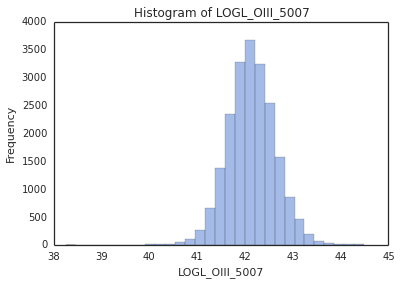

In [84]:
do_basic_statistics(quasars, 'LOGL_OIII_5007')

We note a few outliers with a low luminosity, but apart from that the distribution looks normal. The other luminosities show the same behaviour. 

The mean value of the data is 1.56 with a standard error of 0.00256811305939.
The standard deviation of the data is 0.83.


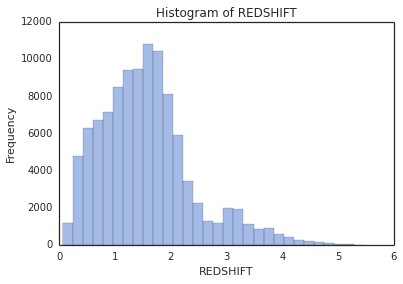

In [85]:
do_basic_statistics(quasars, 'REDSHIFT')

We note that many quasars with low redshift are observed. We are aware of a bias: high redshift quasars are harder to observe, not neccesarily less abundant.

The mean value of the data is 782.10 with a standard error of 32.5329257363.
The standard deviation of the data is 3148.47.


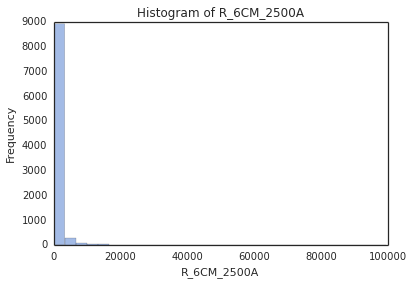

In [86]:
do_basic_statistics(quasars, 'R_6CM_2500A')

We note that the standard deviation is huge, and thus that the mean value we find is not very representative for the dataset. 

The mean value of the data is 8.96 with a standard error of 0.00154022059849.
The standard deviation of the data is 0.50.


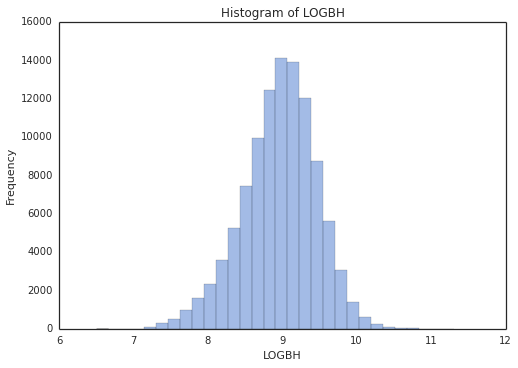

In [73]:
do_basic_statistics(quasars, 'LOGBH')

The distribution looks normal, but negatively skewed. 

# Plot of sky coordinates

The first question we can ask ourselves is how the data is distributed on the
sky, and why. Since SDSS is taken with at the Apache Point Observatory with
coordinates 32°46′49″N 105°49′13″W we expect the Northern hemisphere to be
visible, but low declinations are not expected. Moreover, the dataset has a
reasonably high number of datapoints (105362, taking into account only quasars
with uniformity != 2), so we do not expect any observational biases. If we look
at the plot of the RA and DEC in hammer projection we can se a 'main blob' of
datapoints, and three stripes at similar declination but with changing Right
Ascension. According to Phil Uttley these stripes are observations to track
time variability of objects (personal communication, November 13th, 2015).
Compared to the sky plot avable on the website of the SDSS DR7 we see a bit
more pointings at 'seemingly' random points on the sky. Phil Uttley noted that
Yue Shen added several datapoints obtained trough other means than from SDSS
DR7 (personal communication, November 13th, 2015).

It would be interesting to encode certain information in the colour of the plot
to check whether certain parameters are have a preferred location. However, the 
assignment states that the sky coordinates are not relevant for our purpose, so
this has not been examined in more detail.

Found 105362 quasars in intersection of 'RA' and 'DEC'
Finding intersection takes 0.176000118256 seconds.
Plotting 105362 quasars takes 0.550999879837 seconds.


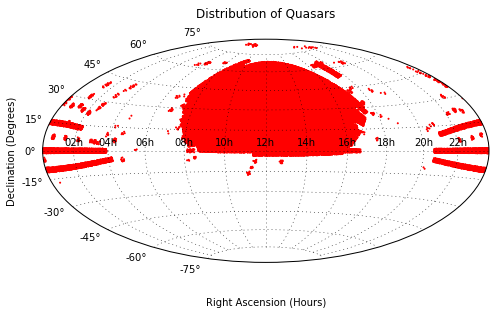

In [11]:
plot_sky_map(quasars)

In [18]:
from IPython.display import Image
Image(url='http://classic.sdss.org/dr7/dr7photo_big.gif')

# Colour vs Black Hole Mass
### Question
Does the 'colour', which is the ratio of the luminosity in two continuum 
bands (i.e. the difference in log-‐luminosities), depend on the mass or 
luminosity of an object? Besides calculating ratios directly, you can also 
test this by determining the parameters of the linear correlation between 
luminosity two bands (we will leave you to work out how...).

Found 19517 quasars in intersection of 'LOGL3000', 'LOGL5100', and 'LOGBH'
Finding intersection takes 0.263000011444 seconds.

Plotting 19517 quasars takes 0.144000053406 seconds.


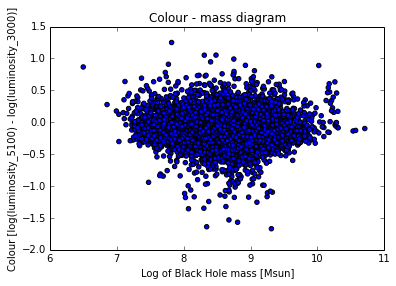

Spearman's Rho = -0.0966904275348, p-value = 9.22425613321e-42
t = -13.5708617338

Pearsons's r = -0.0655926262403, p-value = 4.60909122785e-20
t = -9.18280930985

Linear Regression
slope=-0.17	intercept=8.51 	r_value=-0.07	p_value=0.00 	std_err=0.02


In [19]:
plot_colour_versus_mass(quasars)

#### Conclusion

The value of both correlation coefficients is near zero, but with a very low p-value. This implies a very weak, but significant  correlation. A correlation is thus found, however, since it is so weak in can in practice hardly be used to for example make even rough predictions about the mass of a black hole, once its color is made, or vice versa. 

# Eddington Limit

The Eddington limit is a theoretical limit to how luminous an accreting object, in this case a quasar, can be. This is dependent of the mass of the blackhole and the definition is: LOG(L-Edd) = 38.1 + LOG(M-bh). Here the mass of the black hole is in units of solar masses. To investigate whether we see this limit present in our data, we plot the given function over a scatter plot of the masses and bolometric luminosities of the quasars. 

Found 104386 quasars in intersection of 'LOGLBOL' and 'LOGBH'


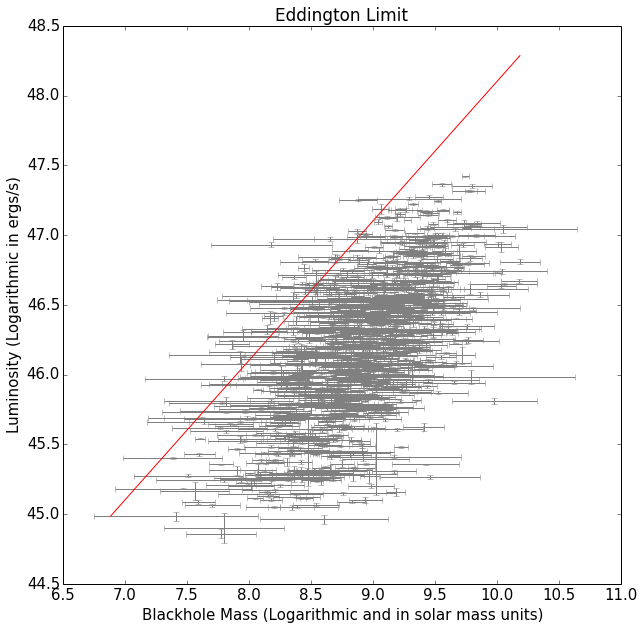

In [15]:
bolometric_luminosity, bolometric_luminosity_err, blackhole_mass, blackhole_mass_err\
    = find_intersection(quasars, 'LOGLBOL', 'LOGBH')
    
show_eddington_limit(bolometric_luminosity, bolometric_luminosity_err,
                         blackhole_mass, blackhole_mass_err, 1000)

If we look at the plot we can clearly see that most of the quasars are below the theoretical limit. To make the plot a little bit clearer, we only plot 1000 quasars and we discard the ones with an uncertainty in the mass of more than 10 percent of the mass (If the error is larger than 10% of the blackhole mass, we disregard the quasar from our set. This is because then we could find that the Eddington limit is exceeded, while this could be due to the large error on the data). In the case of larger uncertainties the mass will have a much bigger chance of reaching the Eddington Limit, but because of the large error we cannot conclude anything from these points. 
We also see that some points are more luminous than the Eddington Limit. This is because the limit is purely theoretical and in certain cases the luminosity can be somewhat higher. 

# Linear Regression and Bootstrapping on the Mass-Luminosity Relation

In the previous plot we saw the bolometric luminosity plotted against the mass of the blackhole. This plot indicated a linear relation between these two variables in logspace. Therefore it may be interesting to see what this relation is exactly. 

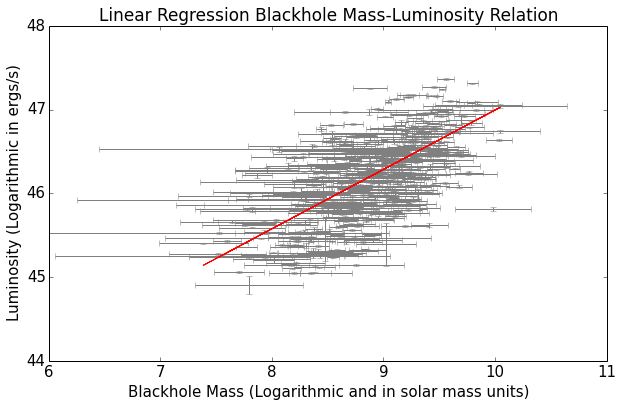

a=0.71, and b=39.90 Standard deviation of a, s_a=0.03, and of b, s_b=0.29.


In [16]:
do_linear_regression(blackhole_mass, blackhole_mass_err, bolometric_luminosity, bolometric_luminosity_err, 500)

From this linear regression we obtain: $$Log(L) = 0.71*Log(M_{bh}) + 39.90$$

With the method we used to do this linear regression we can also get an error estimate on the obtained parameters. To check whether these errors are correct, we use bootstrapping. This means that we choose a random sample from the sample we have and calculate the parameters again. By doing this many times, we can calculate a confidence interval for the parameters. 

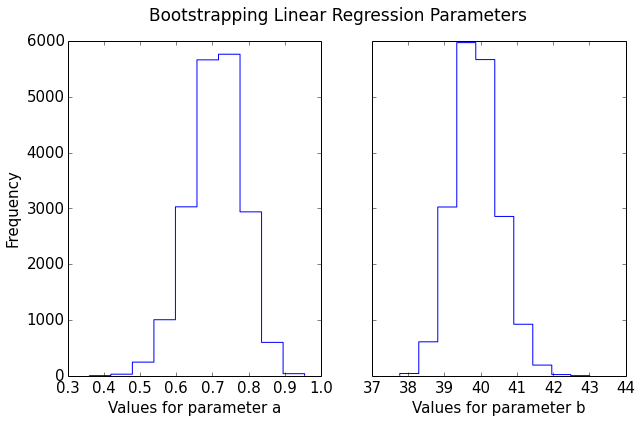

Mean value of a is 0.71, and mean value of b is 39.89
The 68.2 percent confidence interval for a is [0.64, 0.78].
The 68.2 percent confidence interval for b is [39.27, 40.52].


In [17]:
bootstrap(blackhole_mass, bolometric_luminosity, bolometric_luminosity_err, 500)

For the bootstrapping we used $N_{boot}\sim n (ln(n))^2$ as the number of times we pick a random sample and do the linear regression. In the plotted histograms we see what looks like a normal distribution for the values of the paramaters $a$ and $b$. By calculating the mean of the paramters, we see that this is almost the same as the values we obtained earlier. With bootstrapping we can now calculate a confidence interval. We chose the 68.2 percent confidence interval, because this is the range within $1\sigma$. Therefore we can conclude that $\sigma$ for $a$ is 0.07 and $\sigma$ for $b$ is 0.62. Comparing this with the errors calculated before with the standard python routine, we see that the earlier ones are underestimated. 

#### The numbers in the text can slightly deviate from the numbers returned, because they depend on how many quasars we include in the sample (due to computational power we sometimes used a subset of 500 quasars instead of the whole set).

# Continuum and Line Emissions

Now we look at the correlations between some of the continuum and line emissions. We chose the 510 nm and 300 nm continuum emissions, the H$_{\beta}$ narrow line and the Magnesium II line. 

Plotting takes 14.493999958 seconds.


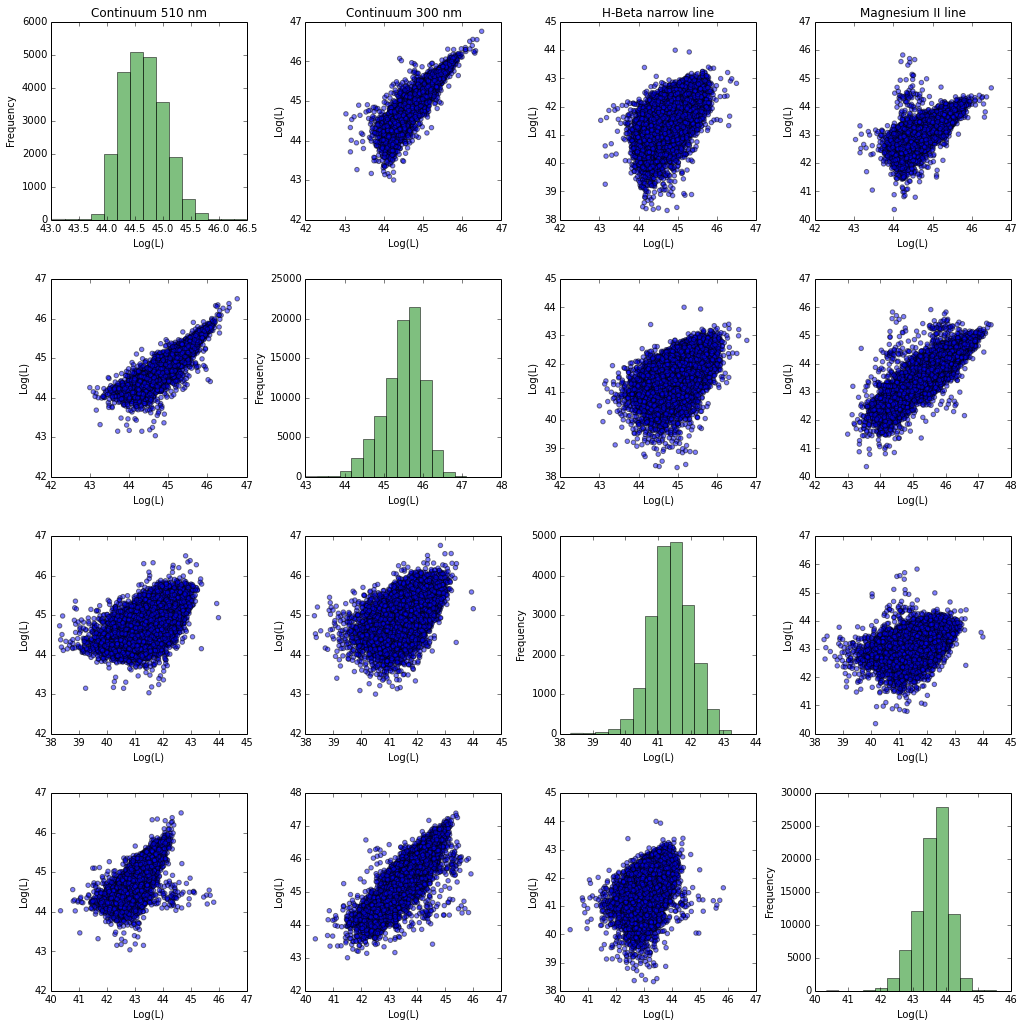

In [18]:
plot_matrixplot(quasars)

In the matrix-plot above we see the relations between different continuums and line emissions. As expected, the two continuums show a linear relation. This is probably because the wavelengths are only 210 nm apart, and a stronger continuum in one wavelength will therefore automatically produce a stronger continuum in the other wavelength. 
At first glance, we see little correlation between the H$_{\beta}$ narrow line and the continuums. The magnesium II line however shows very strong correlation with the 300 nm continuum emission. This can be due to the fact that the strongest absorption line of ionized magnesium (Mg II) has a wavelength of 279.6 nm. Therefore is there is more continuum emission at 300 nm, more of these photons will be absorbed by ionized magnesium. Below we also calculate the correlation efficient directly for the variables in the plots above. 

In [23]:
give_correlation_coefficient(quasars)

The correlation coefficients are:
                Cont 510 nm  Cont 300 nm  Hb narrow line  Mg II line
Cont 510 nm            1.00         0.92            0.57        0.74
Cont 300 nm            0.92         1.00            0.51        0.91
Hb narrow line         0.57         0.51            1.00        0.40
Mg II line             0.74         0.91            0.40        1.00

[4 rows x 4 columns]


Because it is fairly quick to calculate correlation coefficients, we use 100 000 quasars for this calculation. We now see that the continuum 300 nm emission and the Mg II line emission are almost fully correlated. 
Also notable is that all of the variables are in some way positively correlated. This can be due to the fact that a higher continuum emission gives rise to more photons being emitted and therefore also stronger lines are formed. 

# Redshift versus emission line strength

### Broad H$\alpha$

Found 4816 quasars in intersection of 'REDSHIFT' and 'LOGL_BROAD_HA'

Spearman's Rho
Self-written method:	0.274740317045
Scipy method:		0.274740129487
Spearman's r
Self-written method:	0.246036983824
Scipy method:		0.246036983824

Linear regression: 


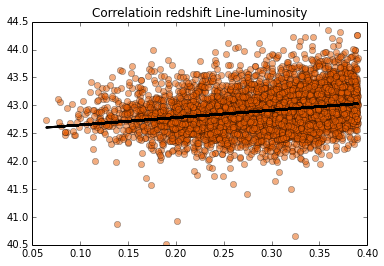

y = 42.52 + 1.31*x


In [43]:
correlate_redshift_emission_line(quasars, 'LOGL_BROAD_HA')

### Narrow Halpha

Found 4635 quasars in intersection of 'REDSHIFT' and 'LOGL_NARROW_HA'

Spearman's Rho
Self-written method:	0.230126602634
Scipy method:		0.230126403391
Spearman's r
Self-written method:	0.189851231118
Scipy method:		0.189851231118

Linear regression: 


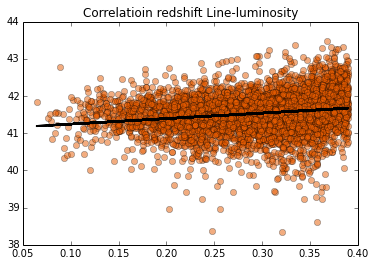

y = 41.10 + 1.48*x


In [44]:
correlate_redshift_emission_line(quasars, 'LOGL_NARROW_HA')

### Broad Hbeta

Found 20085 quasars in intersection of 'REDSHIFT' and 'LOGL_NARROW_HB'

Spearman's Rho
Self-written method:	0.566408910908
Scipy method:		0.566408901308
Spearman's r
Self-written method:	0.537547684748
Scipy method:		0.537547684748

Linear regression: 


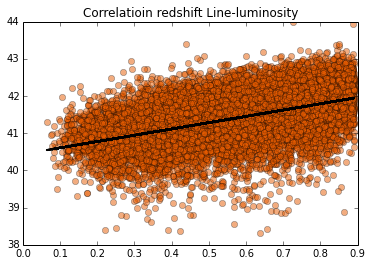

y = 40.44 + 1.69*x


In [45]:
correlate_redshift_emission_line(quasars, 'LOGL_NARROW_HB')

### OIII 5007

Found 85513 quasars in intersection of 'REDSHIFT' and 'LOGL_MGII'

Spearman's Rho
Self-written method:	0.736485399599
Scipy method:		0.736485398872
Spearman's r
Self-written method:	0.743002111678
Scipy method:		0.743002111678

Linear regression: 


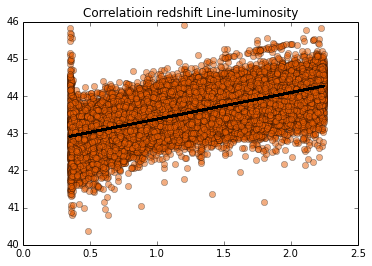

y = 42.67 + 0.71*x


In [46]:
correlate_redshift_emission_line(quasars, 'LOGL_MGII')

### LOGL_CIV

Found 51876 quasars in intersection of 'REDSHIFT' and 'LOGL_CIV'

Spearman's Rho
Self-written method:	0.437721539977
Scipy method:		0.437721536589
Spearman's r
Self-written method:	0.399951835846
Scipy method:		0.399951835846

Linear regression: 


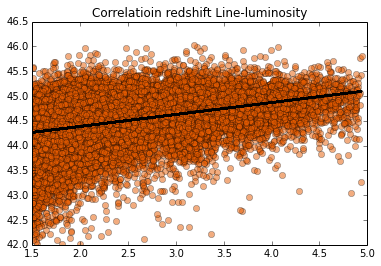

y = 43.91 + 0.24*x


In [47]:
correlate_redshift_emission_line(quasars, 'LOGL_CIV')

## Conclusion
In all the lines, one sees a clear correlation between redshift and line luminosity: with a higher redshift, the line luminosity is higher, on average. 
Perhaps we deal with an observational bias here: maybe for higher redshift quasars one only sees the line when it is strong? Such a bias is not plausible for two reasons:
- We expect that when you measure the line, you have already identified the quasar, so you measure that *assuming there is a quasar*, what is the line strength? So if the quasar is too weak to measure the line of, we expect just a low line luminosity.
- If you look at different lines of which we have a subset of quasars in the same redshift range, the correlations are different. For example compare the CIV line with the MGII line in the overlapping redshift range from z=1.5 to z = 2.2. The correlation of the MGII line in this range is is ~0.34, while that of the CIV line is 0.25, see the plots below:

CIV LINE
Found 51876 quasars in intersection of 'REDSHIFT' and 'LOGL_CIV'

Spearman's Rho
Self-written method:	0.246732206094
Scipy method:		0.246732191767
Spearman's r
Self-written method:	0.247120227486
Scipy method:		0.247120227486

Linear regression: 


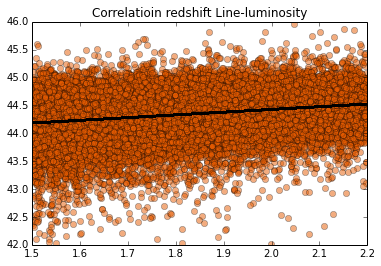

y = 43.45 + 0.49*x


MGII LINE
Found 85513 quasars in intersection of 'REDSHIFT' and 'LOGL_MGII'

Spearman's Rho
Self-written method:	0.357196784065
Scipy method:		0.357196771812
Spearman's r
Self-written method:	0.345853728675
Scipy method:		0.345853728675

Linear regression: 


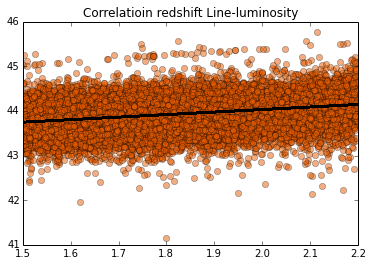

y = 42.90 + 0.57*x


In [48]:
print "CIV LINE"
correlate_redshift_emission_line(quasars, 'LOGL_CIV', True)
print "\n\nMGII LINE"
correlate_redshift_emission_line(quasars, 'LOGL_MGII', True)

Unless there is another bias where we are not aware of at the moment, we conclude that there is indeed a correlation between redshift and line strength.

# Radio-Loudness vs Color = log(L300nm)-log(L135nm)
In order to create a subset of relevant data, we call the function find_intersection. 
We will need quasars of which the following information is known:
- The radio-loudness (R_6CM_2500A)
- The Luminosity in two bands. By subtracting these (dividing actually: but subtracting because they are log), we obtain a color.

The find_intersection function will return only quasars of which these 3 fields contain useful values (so not -1 or None). The data is returned in the form of 6 arrays, for each variable the values and their errors. The radio-loudness does not have errors, therefore its error array is empty.

In [54]:
R_6CM_2500A, R_6CM_2500A_ERR, LOGL3000, LOGL3000_ERR, LOGL1350, LOGL1350_ERR\
    = find_intersection(quasars, 'R_6CM_2500A', 'LOGL3000','LOGL1350')

Found 2561 quasars in intersection of 'R_6CM_2500A', 'LOGL3000', and 'LOGL1350'


### Summaries and plots
We make a summary of the radio-loudness data of the quasars in our subset. We see that the bulk of the values are < 1000, but that the maximum values are very high, which can hint to outliers.

In [70]:
radio_loudness_vs_colour(quasars, 'LOGL3000', 'LOGL1350',
                         describe=True)

Found 2561 quasars in intersection of 'R_6CM_2500A', 'LOGL3000', and 'LOGL1350'
count     2561.000000
mean       710.562974
std       1746.996140
min          0.763964
25%         36.071615
50%        135.795184
75%        564.199277
max      22627.325758
dtype: float64


The mean value of the data is 782.10 with a standard error of 32.5329257363.
The standard deviation of the data is 3148.47.


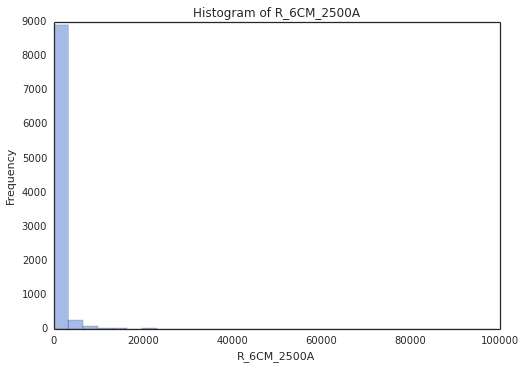

In [69]:
do_basic_statistics(quasars, 'R_6CM_2500A')

For each quasar we calculate the color, which is the difference between the 300nm and the 135nm luminosity.

After this, we split this list in two lists (and corresponding radio-loudness lists), one for the radio-loud quasars (radio-loudness > 10, and one for the radio-quiet quasars (radio-loudness < 10)).

In [56]:
radio_loudness_vs_colour(quasars, 'LOGL3000', 'LOGL1350',
                         describe=False, describe_subset=True)

Found 2561 quasars in intersection of 'R_6CM_2500A', 'LOGL3000', and 'LOGL1350'
Radio loud quasars:
count    2346.000000
mean       -0.076069
std         0.235050
min        -0.807967
25%        -0.211519
50%        -0.124497
75%         0.000381
max         1.734738
dtype: float64
 
Radio quiet quasars:
count    215.000000
mean      -0.006313
std        0.220846
min       -0.338647
25%       -0.148999
50%       -0.067100
75%        0.077159
max        0.896160
dtype: float64


From the five-number summaries we see that the means as well as the medians differ. We plot histograms of the color of the two subsets to see whether their distributions differ. This does indeed seem to be the case (see plots below).

Found 2561 quasars in intersection of 'R_6CM_2500A', 'LOGL3000', and 'LOGL1350'


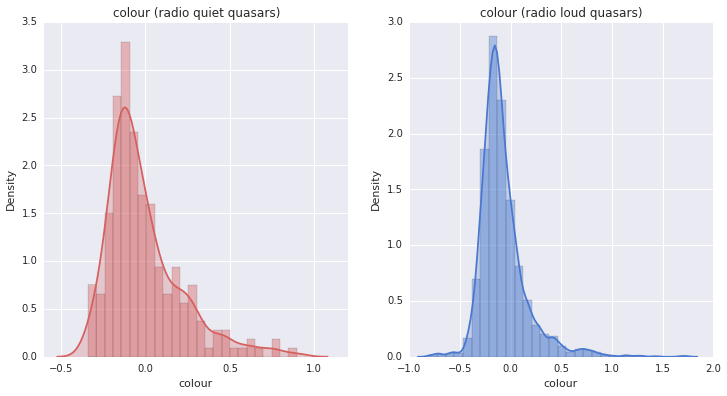

In [52]:
colourlist, radio_loud, radio_quiet, radio_loud_colour, radio_quiet_colour =\
    radio_loudness_vs_colour(quasars, 'LOGL3000', 'LOGL1350')
plot_histogram_radioloud_radioquiet(radio_loud, radio_quiet,
                                    radio_loud_colour, radio_quiet_colour)

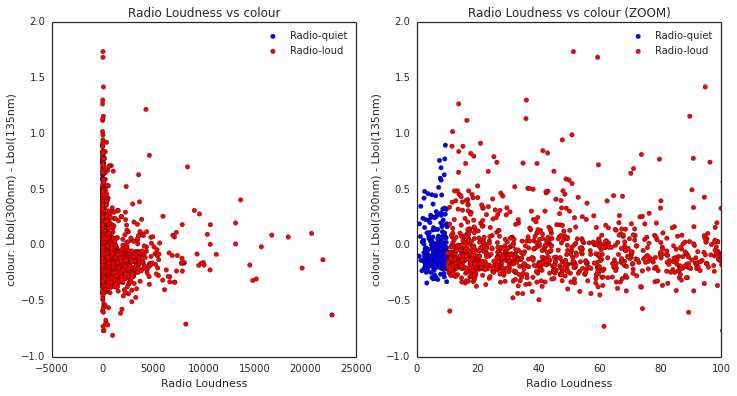

In [53]:
plot_radioloudness_vs_colour(colourlist, radio_loud,
                             radio_quiet, radio_loud_colour, radio_quiet_colour)

From the above scatter plots it is not obvious that, if at all, the means differ significantly. Boxplots show the differece between the subsets a little bit clearer:

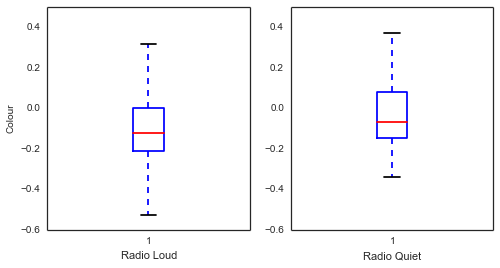

In [35]:
create_boxplot_radioloudness(radio_loud_colour, radio_quiet_colour)

### K-S Test
For finding a more definitive answer to the question whether the color of radio-quiet quasars differs from that of the radio-loud ones, we carry out statistical tests. 

From the histograms we see that the distributions are not neccesarily normal, therefore we use the non-parametric Kolmogorov-Smirnov (K-S) test to find out whether there is a statistically significant difference between the two:

In [36]:
ks_test(radio_loud_colour, radio_quiet_colour)

Mean color of radio quiet quasars: -0.00631312328149
Mean color of radio loud quasars: -0.0760688623819
The K-S test gives us a D-value of 0.191530363409 corresponding to a p-value of 8.14154379275e-07.
This means that with 0.999999185846 certainty we can say that the two samples are drawn from a different distribution.


### T-Statistic
We can also calculate the t-statistic for this distribution. Because the sample sizes differ and the variances probably also (we have no reason to assume that they do not), we use the Welch t-test, for wich we first write a function:

In [37]:
print_t_statistic(radio_loud_colour, radio_quiet_colour)

The t-statistic is: 4.40820173396
Degrees of freedom: 260
The corresponding p-value is: 1.52618180112e-05
We can thus say that the chance that the difference in color between radio loud and radio quiet quasars is significant is 0.999984738182.


In [38]:
import scipy
from scipy import stats
scipy.stats.norm.sf(4.33)*2   # Sigma found by trial and error. *2 because: 2 sided distribution. 

1.4910934182710237e-05

If one would translate this to a (normal distrubution equivalent) sigma: 
The colors differ with a ~4 sigma significance.

## Conclusion
The distributions and means of the color (Llog(300nm) - Llog(135nm)) of radio-quiet versus radio-loud quasars differ significantly as is shown by the p-values from both the K-S-test and the t-statistic. The radio-quiet quasars, with a mean color of -0.006 have on average a lower relative luminosity in the 300nm continuum compared to the 135nm continuum than radio-loud quasars, which have a mean color of -0.076. 

# Color = log(L510nm)-log(L300nm)
We can make the same plots and do the same tests for the color calculated from the 510nm and 300nm continuum luminosities:

Found 1959 quasars in intersection of 'R_6CM_2500A', 'LOGL5100', and 'LOGL3000'
count     1959.000000
mean      1085.076885
std       4942.599815
min          0.350591
25%         18.557212
50%         86.346175
75%        477.962378
max      89524.103910
dtype: float64
Found 1959 quasars in intersection of 'R_6CM_2500A', 'LOGL5100', and 'LOGL3000'
Radio loud quasars:
count    1648.000000
mean       -0.074765
std         0.228176
min        -1.096090
25%        -0.224002
50%        -0.128583
75%         0.023284
max         1.053057
dtype: float64
 
Radio quiet quasars:
count    311.000000
mean      -0.229047
std        0.142221
min       -1.567818
25%       -0.282642
50%       -0.224257
75%       -0.154868
max        0.071946
dtype: float64
Found 1959 quasars in intersection of 'R_6CM_2500A', 'LOGL5100', and 'LOGL3000'


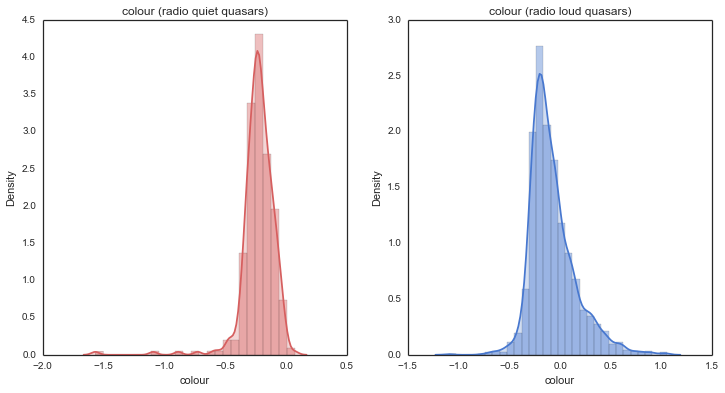

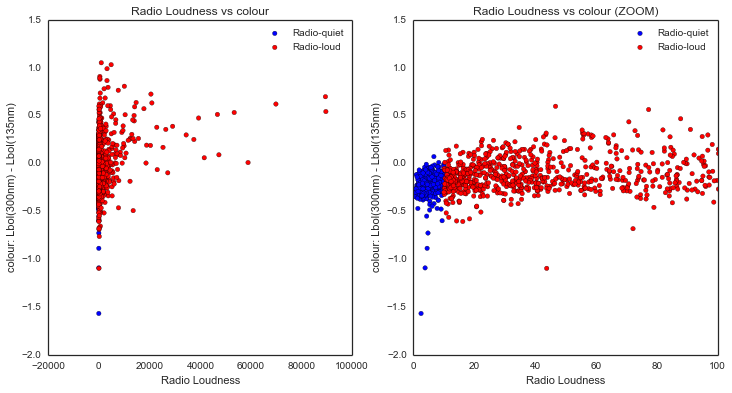

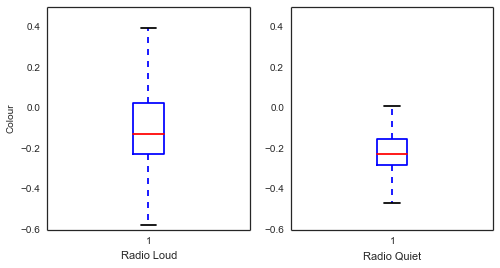

Mean color of radio quiet quasars: -0.229046914449
Mean color of radio loud quasars: -0.0747649721469
The K-S test gives us a D-value of 0.334781709487 corresponding to a p-value of 2.69529822669e-26.
This means that with 1.0 certainty we can say that the two samples are drawn from a different distribution.
The t-statistic is: 15.6949058026
Degrees of freedom: 655
The corresponding p-value is: 2.33430924409e-47
We can thus say that the chance that the difference in color between radio loud and radio quiet quasars is significant is 1.0.


In [39]:
radio_loudness_vs_colour(quasars, 'LOGL5100', 'LOGL3000',
                         describe=True)
radio_loudness_vs_colour(quasars, 'LOGL5100', 'LOGL3000',
                         describe=False, describe_subset=True)
colourlist, radio_loud, radio_quiet, radio_loud_colour, radio_quiet_colour =\
    radio_loudness_vs_colour(quasars, 'LOGL5100', 'LOGL3000')
plot_histogram_radioloud_radioquiet(radio_loud, radio_quiet,
                                    radio_loud_colour, radio_quiet_colour)
plot_radioloudness_vs_colour(colourlist, radio_loud, radio_quiet,
                             radio_loud_colour, radio_quiet_colour)
create_boxplot_radioloudness(radio_loud_colour, radio_quiet_colour)
ks_test(radio_loud_colour, radio_quiet_colour)
print_t_statistic(radio_loud_colour, radio_quiet_colour)

## Conclusion
Also for the other color we find that the distributions and means of the color (Llog(510nm) - Llog(300nm)) of radio-quiet versus radio-loud quasars differ significantly as is shown by both tests. The radio-quiet quasars, with a mean color of -0.229 have on average a higher relative luminosity in the 510nm continuum compared to the 300nm continuum than radio-loud quasars, which have a mean color of -0.074. 

# Redshift-Luminosity: visualising a bias

In order to create a subset of relevant data, we call the function find_intersection. 
We will need quasars of which the following information is known:
- Redshift
- Logbol

We receive a lower flux of quasars with a lower luminosity or a high redshift, therefore our data have a bias. When analysing the data and looking for a correlation, one has to be aware of such a bias. In the code/plots below we visualise this. 

Found 105260 quasars in intersection of 'REDSHIFT' and 'LOGLBOL'


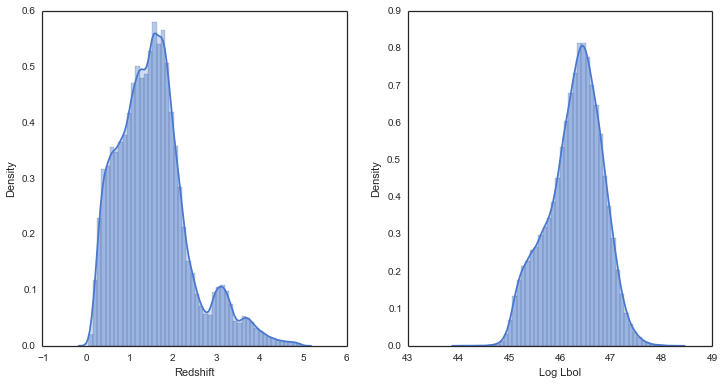

In [40]:
visualise_a_bias(quasars, histograms_only=True)

These histograms show that quasars with a low redshift are more abundant in our data set. Also quasars with a high bolometric luminosity are more abundant.

We now create a subset of the data, the quarter of the data with the lowest errors.

Found 105260 quasars in intersection of 'REDSHIFT' and 'LOGLBOL'


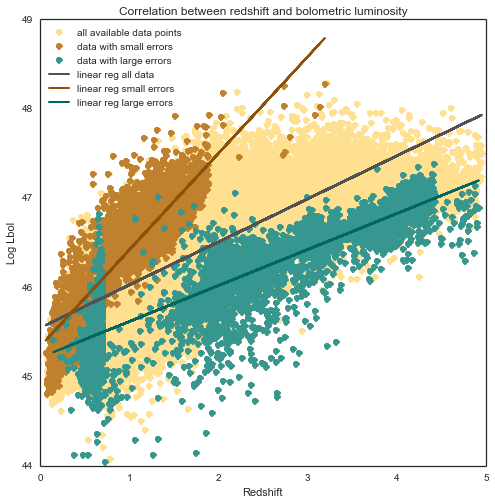

Correlation for the total data set:  0.741427025167
Correlation for the subset with small errors:  0.876030575374


In [41]:
visualise_a_bias(quasars)

(Color blind safe palet! :-D. Inspired by http://colorbrewer2.org)

## Conclusions

On first sight, it might look like the correlation gets stronger when we only look at luminosity data with small error bars. However, we cannot assume that only taking into account data with small errors gives us better insight into the intrinsic properties of the observations rather than observational errors. Instead, the above plot helps us to visualize a bias that results from the amount of flux we receive from each of the objects: from the plot it is clearly visible that quasars with a higher luminosity or with a lower reshift have smaller errors on them. This is what we expect, because flux we receive from these quasars is lower.

So, a stronger correlation with a subset having smaller errors does *not* neccesarily show us that the intrinsic correlation is stronger. This would have possibly been the case when the correlation with the small-error quasars was stronger while these data points were (randomly) scattered over the total data set (which is now clearly not the case: they're all in the upper left corner). 

These observations leads us to question: is the correlation that we measure a real correlation at all, or do we see it purely as the consequence of an observational bias? It could very well be that there are just as many quasars in the lower right part of the graph (high redshift, low bolometric luminosity) and that the true correlation with a complete dataset would be 0, but that we simply are not able to see these quasars.

In this case we know that we deal with a biased data set, because we know how flux works, but this might not always be the case. Studying a subset of data which have very small or large errors on them might in these cases be useful for revealing biases. 


Found 104386 quasars in intersection of 'LOGLBOL', 'LOGBH', and 'REDSHIFT'


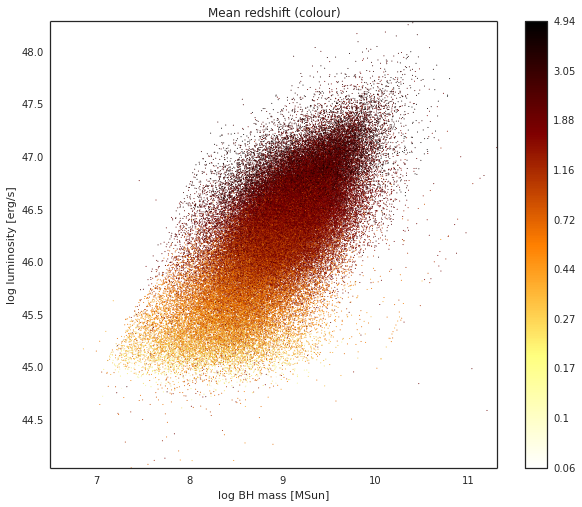

In [87]:
plot_loglbol_bhmass_redshift(quasars)

In this plot, which additionally shows the Lbol and the redshift also shows the mass, the bias is also visible (for more analysis on the M-L relation, see 'Linear Regression and Bootstrapping on the M-L relation above).

# Summary of findings

- Color versus Black hole Mass: there is a very weak, but significant correlation between color and black hole mass.
- Eddington limit: the luminosity of most quasars lies below the theoretical limit. 
- Linear regression and bootstrapping on the M-L relation: the linear fit resulted in the relation: $$Log(L) = 0.71*Log(M_{bh}) + 39.90$$
- Continuum and line emissions:  All of the variables are in some way positively correlated. The continuum 300 nm emission and the Mg II line emission are almost fully correlated. 
- Redshift versus emission line strength: unless there is a bias where we are not aware of at the moment, we find a positive correlation for emission line strength with redshift for all lines. 
- Correlation of radio-loudness and color: the K-S-test and the t-statistic shows that the color of radio loud quasars differs significantly from the color of radio quiet quasars. 
- Redshift-Luminosity: we visualize the observational bias that arises from the fact that a lower flux is harder to observe.